# UNet with 0% Dropout

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet_DR_0(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, dropout_p=0):
        super(UNet_DR_0, self).__init__()
        self.dropout_p = dropout_p
        
        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        
        # Bridge
        self.bridge = self.conv_block(512, 1024)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512)
        
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256)
        
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128)
        
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64)
        
        # Final output layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p)
        )

    def forward(self, x):
        # ---------------- Encoder ----------------
        enc1 = self.enc1(x)                      # (B,64,H,W)
        enc2 = self.enc2(F.max_pool2d(enc1, 2))   # (B,128,H/2,W/2)
        enc3 = self.enc3(F.max_pool2d(enc2, 2))   # (B,256,H/4,W/4)
        enc4 = self.enc4(F.max_pool2d(enc3, 2))   # (B,512,H/8,W/8)

        # ---------------- Bridge ----------------
        bridge = self.bridge(F.max_pool2d(enc4, 2))  # (B,1024,H/16,W/16)

        # ---------------- Decoder ----------------
        # Up4
        dec4 = self.up4(bridge)                    # (B,512,H/8,W/8)
        dec4 = torch.cat([enc4, dec4], dim=1)      # (B,1024,H/8,W/8)
        dec4 = self.dec4(dec4)                     # (B,512,H/8,W/8)

        # Up3
        dec3 = self.up3(dec4)                      # (B,256,H/4,W/4)
        dec3 = torch.cat([enc3, dec3], dim=1)      # (B,512,H/4,W/4)
        dec3 = self.dec3(dec3)                     # (B,256,H/4,W/4)

        # Up2
        dec2 = self.up2(dec3)                      # (B,128,H/2,W/2)
        dec2 = torch.cat([enc2, dec2], dim=1)      # (B,256,H/2,W/2)
        dec2 = self.dec2(dec2)                     # (B,128,H/2,W/2)

        # Up1
        dec1 = self.up1(dec2)                      # (B,64,H,W)
        dec1 = torch.cat([enc1, dec1], dim=1)      # (B,128,H,W)
        dec1 = self.dec1(dec1)                     # (B,64,H,W)

        # Output
        out = self.out(dec1)                       # (B,out_channels,H,W)
        return out

# UNet with 20% Dropout

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet_DR_20(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, dropout_p=0.2):
        super(UNet_DR_20, self).__init__()
        self.dropout_p = dropout_p
        
        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        
        # Bridge
        self.bridge = self.conv_block(512, 1024)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512)
        
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256)
        
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128)
        
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64)
        
        # Final output layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p)
        )

    def forward(self, x):
        # ---------------- Encoder ----------------
        enc1 = self.enc1(x)                      # (B,64,H,W)
        enc2 = self.enc2(F.max_pool2d(enc1, 2))   # (B,128,H/2,W/2)
        enc3 = self.enc3(F.max_pool2d(enc2, 2))   # (B,256,H/4,W/4)
        enc4 = self.enc4(F.max_pool2d(enc3, 2))   # (B,512,H/8,W/8)

        # ---------------- Bridge ----------------
        bridge = self.bridge(F.max_pool2d(enc4, 2))  # (B,1024,H/16,W/16)

        # ---------------- Decoder ----------------
        # Up4
        dec4 = self.up4(bridge)                    # (B,512,H/8,W/8)
        dec4 = torch.cat([enc4, dec4], dim=1)      # (B,1024,H/8,W/8)
        dec4 = self.dec4(dec4)                     # (B,512,H/8,W/8)

        # Up3
        dec3 = self.up3(dec4)                      # (B,256,H/4,W/4)
        dec3 = torch.cat([enc3, dec3], dim=1)      # (B,512,H/4,W/4)
        dec3 = self.dec3(dec3)                     # (B,256,H/4,W/4)

        # Up2
        dec2 = self.up2(dec3)                      # (B,128,H/2,W/2)
        dec2 = torch.cat([enc2, dec2], dim=1)      # (B,256,H/2,W/2)
        dec2 = self.dec2(dec2)                     # (B,128,H/2,W/2)

        # Up1
        dec1 = self.up1(dec2)                      # (B,64,H,W)
        dec1 = torch.cat([enc1, dec1], dim=1)      # (B,128,H,W)
        dec1 = self.dec1(dec1)                     # (B,64,H,W)

        # Output
        out = self.out(dec1)                       # (B,out_channels,H,W)
        return out

# UNet with 40% dropout

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet_DR_40(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, dropout_p=0.4):
        super(UNet_DR_40, self).__init__()
        self.dropout_p = dropout_p
        
        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        
        # Bridge
        self.bridge = self.conv_block(512, 1024)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512)
        
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256)
        
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128)
        
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64)
        
        # Final output layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p)
        )

    def forward(self, x):
        # ---------------- Encoder ----------------
        enc1 = self.enc1(x)                      # (B,64,H,W)
        enc2 = self.enc2(F.max_pool2d(enc1, 2))   # (B,128,H/2,W/2)
        enc3 = self.enc3(F.max_pool2d(enc2, 2))   # (B,256,H/4,W/4)
        enc4 = self.enc4(F.max_pool2d(enc3, 2))   # (B,512,H/8,W/8)

        # ---------------- Bridge ----------------
        bridge = self.bridge(F.max_pool2d(enc4, 2))  # (B,1024,H/16,W/16)

        # ---------------- Decoder ----------------
        # Up4
        dec4 = self.up4(bridge)                    # (B,512,H/8,W/8)
        dec4 = torch.cat([enc4, dec4], dim=1)      # (B,1024,H/8,W/8)
        dec4 = self.dec4(dec4)                     # (B,512,H/8,W/8)

        # Up3
        dec3 = self.up3(dec4)                      # (B,256,H/4,W/4)
        dec3 = torch.cat([enc3, dec3], dim=1)      # (B,512,H/4,W/4)
        dec3 = self.dec3(dec3)                     # (B,256,H/4,W/4)

        # Up2
        dec2 = self.up2(dec3)                      # (B,128,H/2,W/2)
        dec2 = torch.cat([enc2, dec2], dim=1)      # (B,256,H/2,W/2)
        dec2 = self.dec2(dec2)                     # (B,128,H/2,W/2)

        # Up1
        dec1 = self.up1(dec2)                      # (B,64,H,W)
        dec1 = torch.cat([enc1, dec1], dim=1)      # (B,128,H,W)
        dec1 = self.dec1(dec1)                     # (B,64,H,W)

        # Output
        out = self.out(dec1)                       # (B,out_channels,H,W)
        return out

# UNet with 60% Dropout

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet_DR_60(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, dropout_p=0.6):
        super(UNet_DR_60, self).__init__()
        self.dropout_p = dropout_p
        
        # Encoder
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)
        
        # Bridge
        self.bridge = self.conv_block(512, 1024)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.conv_block(1024, 512)
        
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256)
        
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128)
        
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64)
        
        # Final output layer
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p=self.dropout_p)
        )

    def forward(self, x):
        # ---------------- Encoder ----------------
        enc1 = self.enc1(x)                      # (B,64,H,W)
        enc2 = self.enc2(F.max_pool2d(enc1, 2))   # (B,128,H/2,W/2)
        enc3 = self.enc3(F.max_pool2d(enc2, 2))   # (B,256,H/4,W/4)
        enc4 = self.enc4(F.max_pool2d(enc3, 2))   # (B,512,H/8,W/8)

        # ---------------- Bridge ----------------
        bridge = self.bridge(F.max_pool2d(enc4, 2))  # (B,1024,H/16,W/16)

        # ---------------- Decoder ----------------
        # Up4
        dec4 = self.up4(bridge)                    # (B,512,H/8,W/8)
        dec4 = torch.cat([enc4, dec4], dim=1)      # (B,1024,H/8,W/8)
        dec4 = self.dec4(dec4)                     # (B,512,H/8,W/8)

        # Up3
        dec3 = self.up3(dec4)                      # (B,256,H/4,W/4)
        dec3 = torch.cat([enc3, dec3], dim=1)      # (B,512,H/4,W/4)
        dec3 = self.dec3(dec3)                     # (B,256,H/4,W/4)

        # Up2
        dec2 = self.up2(dec3)                      # (B,128,H/2,W/2)
        dec2 = torch.cat([enc2, dec2], dim=1)      # (B,256,H/2,W/2)
        dec2 = self.dec2(dec2)                     # (B,128,H/2,W/2)

        # Up1
        dec1 = self.up1(dec2)                      # (B,64,H,W)
        dec1 = torch.cat([enc1, dec1], dim=1)      # (B,128,H,W)
        dec1 = self.dec1(dec1)                     # (B,64,H,W)

        # Output
        out = self.out(dec1)                       # (B,out_channels,H,W)
        return out

# Training all models

In [5]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd
from tqdm import tqdm
from PIL import Image


IMG_HEIGHT = 640
IMG_WIDTH = 640
BATCH_SIZE = 2
EPOCHS = 100
NUM_CLASSES = 3
LEARNING_RATE = 0.001
PATIENCE = 10  # Early stopping
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


IMAGE_DIR = 'CWD-3HSV/train/images'
MASK_DIR  = 'CWD-3HSV/train/Morphed_Images'
VALID_IMAGE_DIR = 'CWD-3HSV/valid/images'
VALID_MASK_DIR  = 'CWD-3HSV/valid/Morphed_Images'


class SegmentationDataset(Dataset):
    def __init__(self, image_files, mask_files, transform=None):
        self.image_files = image_files
        self.mask_files  = mask_files
        self.transform   = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path  = self.image_files[idx]
        mask_path = self.mask_files[idx]
        image = Image.open(img_path).convert('RGB')
        mask  = Image.open(mask_path).convert('L')

        # Resize
        image = image.resize((IMG_WIDTH, IMG_HEIGHT))
        mask  = mask.resize((IMG_WIDTH, IMG_HEIGHT))

        if self.transform:
            image = self.transform(image)
            mask  = torch.tensor(np.array(mask), dtype=torch.long)

        return image, mask


image_files = [f for f in os.listdir(IMAGE_DIR) if f.endswith('.jpg')]
mask_files  = [f.replace('.jpg', '_morphed.png') for f in image_files]

valid_image_files = []
valid_mask_files  = []
for img_file in image_files:
    mask_file = img_file.replace('.jpg', '_morphed.png')
    if mask_file in os.listdir(MASK_DIR):
        valid_image_files.append(os.path.join(IMAGE_DIR, img_file))
        valid_mask_files.append(os.path.join(MASK_DIR,  mask_file))

val_image_files = [os.path.join(VALID_IMAGE_DIR, f) for f in os.listdir(VALID_IMAGE_DIR) if f.endswith('.jpg')]
val_mask_files  = [os.path.join(VALID_MASK_DIR,  f.replace('.jpg', '_morphed.png'))
                   for f in os.listdir(VALID_IMAGE_DIR) if f.endswith('.jpg')]

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = SegmentationDataset(valid_image_files, valid_mask_files, transform=transform)
val_dataset   = SegmentationDataset(val_image_files,   val_mask_files,   transform=transform)

train_loader  = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader    = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False)


def calculate_iou(outputs, masks, num_classes):
    # outputs: (B, num_classes, H, W)
    outputs = torch.argmax(outputs, dim=1)
    iou_per_class = []
    for cls in range(num_classes):
        intersection = ((outputs == cls) & (masks == cls)).sum().item()
        union        = ((outputs == cls) | (masks == cls)).sum().item()
        if union == 0:
            iou_per_class.append(float('nan'))
        else:
            iou_per_class.append(intersection / union)
    return np.nanmean(iou_per_class)

def calculate_iou_loss(outputs, masks, num_classes):
    # 1 - mean IoU
    iou = calculate_iou(outputs, masks, num_classes)
    return 1 - iou


def train_epoch(model, data_loader, optimizer, criterion):
    model.train()
    running_loss     = 0.0
    running_iou_loss = 0.0
    correct          = 0
    total            = 0
    iou_score        = 0

    for images, masks in tqdm(data_loader, desc="Training", leave=False):
        images, masks = images.to(DEVICE), masks.to(DEVICE)

        optimizer.zero_grad()
        outputs  = model(images)
        loss     = criterion(outputs, masks)
        iou_loss = calculate_iou_loss(outputs, masks, NUM_CLASSES)

        loss.backward()
        optimizer.step()

        running_loss     += loss.item()
        running_iou_loss += iou_loss
        _, predicted     = torch.max(outputs, 1)
        total           += masks.numel()
        correct         += (predicted == masks).sum().item()
        iou_score       += calculate_iou(outputs, masks, NUM_CLASSES)

    epoch_loss      = running_loss / len(data_loader)
    epoch_iou_loss  = running_iou_loss / len(data_loader)
    epoch_accuracy  = correct / total * 100
    epoch_iou       = iou_score / len(data_loader)
    return epoch_loss, epoch_accuracy, epoch_iou, epoch_iou_loss

def evaluate(model, data_loader, criterion):
    model.eval()
    running_loss     = 0.0
    running_iou_loss = 0.0
    correct          = 0
    total            = 0
    iou_score        = 0

    with torch.no_grad():
        for images, masks in tqdm(data_loader, desc="Validation", leave=False):
            images, masks = images.to(DEVICE), masks.to(DEVICE)

            outputs  = model(images)
            loss     = criterion(outputs, masks)
            iou_loss = calculate_iou_loss(outputs, masks, NUM_CLASSES)

            running_loss     += loss.item()
            running_iou_loss += iou_loss
            _, predicted     = torch.max(outputs, 1)
            total           += masks.numel()
            correct         += (predicted == masks).sum().item()
            iou_score       += calculate_iou(outputs, masks, NUM_CLASSES)

    epoch_loss      = running_loss / len(data_loader)
    epoch_iou_loss  = running_iou_loss / len(data_loader)
    epoch_accuracy  = correct / total * 100
    epoch_iou       = iou_score / len(data_loader)
    return epoch_loss, epoch_accuracy, epoch_iou, epoch_iou_loss

def train_and_evaluate_model(model_name, model_class, 
                             train_loader, val_loader,
                             epochs=EPOCHS, patience=PATIENCE):
    """
    Train a given model with the specified name/class 
    and store best model + metrics in a separate folder.
    """
    # 1) Create directory for this model
    model_dir = model_name
    os.makedirs(model_dir, exist_ok=True)

    # 2) Instantiate model + move to device
    model = model_class(in_channels=3, out_channels=NUM_CLASSES).to(DEVICE)

    # 3) Define optimizer + loss
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()

    best_val_loss   = float('inf')
    best_model_path = None
    patience_counter= 0
    records         = []

    for epoch in range(epochs):
        print(f"\n[{model_name}] Epoch {epoch+1}/{epochs}")

        train_loss, train_accuracy, train_iou, train_iou_loss = train_epoch(model, train_loader, optimizer, criterion)
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Train IoU: {train_iou:.4f}, Train IoU Loss: {train_iou_loss:.4f}")

        val_loss, val_accuracy, val_iou, val_iou_loss = evaluate(model, val_loader, criterion)
        print(f"Val Loss:   {val_loss:.4f}, Val Accuracy:   {val_accuracy:.2f}%, "
              f"Val IoU:   {val_iou:.4f}, Val IoU Loss:   {val_iou_loss:.4f}")

        records.append([
            epoch+1, 
            train_loss, 
            train_accuracy, 
            val_loss, 
            val_accuracy, 
            train_iou_loss, 
            train_iou, 
            val_iou_loss, 
            val_iou
        ])

        # early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_path = os.path.join(model_dir, "unet_best_model.pth")
            torch.save(model, best_model_path)
            print(f"  [*] Best model saved at {best_model_path}")
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"  [!] Early stopping for {model_name}")
            break

    # 4) Save Training_Metrics.xlsx in model_dir
    excel_path = os.path.join(model_dir, "Training_Metrics.xlsx")
    columns = [
        "Epoch", 
        "Training Loss", 
        "Training Accuracy", 
        "Validation Loss", 
        "Validation Accuracy", 
        "Training IoU loss", 
        "Mean Training IoU", 
        "Validation IoU loss", 
        "Mean Validation IoU"
    ]
    df = pd.DataFrame(records, columns=columns)
    df.to_excel(excel_path, index=False)
    print(f"  Metrics saved to {excel_path}")

    print(f"Done training {model_name}.\n")


if __name__ == "__main__":
    # List of models you want to train
    models_to_train = {
        "Unet-DR-0"      : UNet_DR_0,
        "Unet-DR-20"      : UNet_DR_20,
        "Unet-DR-40"      : UNet_DR_40,
        "Unet-DR-60"      : UNet_DR_60,
    }

    for model_name, model_class in models_to_train.items():
        train_and_evaluate_model(model_name, model_class, 
                                 train_loader, val_loader,
                                 epochs=EPOCHS, patience=PATIENCE)



[Unet-DR-0] Epoch 1/100


Train Loss: 0.5090, Train Accuracy: 82.51%, Train IoU: 0.5027, Train IoU Loss: 0.4973


Val Loss:   0.2932, Val Accuracy:   88.69%, Val IoU:   0.6850, Val IoU Loss:   0.3150
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 2/100


Train Loss: 0.1910, Train Accuracy: 92.50%, Train IoU: 0.7450, Train IoU Loss: 0.2550


Val Loss:   0.1772, Val Accuracy:   93.00%, Val IoU:   0.8168, Val IoU Loss:   0.1832
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 3/100


Train Loss: 0.1578, Train Accuracy: 93.90%, Train IoU: 0.7828, Train IoU Loss: 0.2172


Val Loss:   0.1805, Val Accuracy:   93.05%, Val IoU:   0.7954, Val IoU Loss:   0.2046

[Unet-DR-0] Epoch 4/100


Train Loss: 0.1334, Train Accuracy: 94.95%, Train IoU: 0.8085, Train IoU Loss: 0.1915


Val Loss:   0.1318, Val Accuracy:   94.91%, Val IoU:   0.8545, Val IoU Loss:   0.1455
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 5/100


Train Loss: 0.1208, Train Accuracy: 95.50%, Train IoU: 0.8194, Train IoU Loss: 0.1806


Val Loss:   0.1262, Val Accuracy:   95.13%, Val IoU:   0.8583, Val IoU Loss:   0.1417
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 6/100


Train Loss: 0.1122, Train Accuracy: 95.83%, Train IoU: 0.8300, Train IoU Loss: 0.1700


Val Loss:   0.1185, Val Accuracy:   95.93%, Val IoU:   0.8786, Val IoU Loss:   0.1214
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 7/100


Train Loss: 0.1060, Train Accuracy: 96.07%, Train IoU: 0.8361, Train IoU Loss: 0.1639


Val Loss:   0.1348, Val Accuracy:   94.69%, Val IoU:   0.8402, Val IoU Loss:   0.1598

[Unet-DR-0] Epoch 8/100


Train Loss: 0.1013, Train Accuracy: 96.28%, Train IoU: 0.8425, Train IoU Loss: 0.1575


Val Loss:   0.2176, Val Accuracy:   93.29%, Val IoU:   0.8212, Val IoU Loss:   0.1788

[Unet-DR-0] Epoch 9/100


Train Loss: 0.1009, Train Accuracy: 96.31%, Train IoU: 0.8447, Train IoU Loss: 0.1553


Val Loss:   0.1193, Val Accuracy:   95.49%, Val IoU:   0.8649, Val IoU Loss:   0.1351

[Unet-DR-0] Epoch 10/100


Train Loss: 0.0943, Train Accuracy: 96.58%, Train IoU: 0.8526, Train IoU Loss: 0.1474


Val Loss:   0.1030, Val Accuracy:   96.25%, Val IoU:   0.8860, Val IoU Loss:   0.1140
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 11/100


Train Loss: 0.0915, Train Accuracy: 96.66%, Train IoU: 0.8567, Train IoU Loss: 0.1433


Val Loss:   0.0997, Val Accuracy:   96.24%, Val IoU:   0.8868, Val IoU Loss:   0.1132
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 12/100


Train Loss: 0.0899, Train Accuracy: 96.73%, Train IoU: 0.8564, Train IoU Loss: 0.1436


Val Loss:   0.1328, Val Accuracy:   94.75%, Val IoU:   0.8458, Val IoU Loss:   0.1542

[Unet-DR-0] Epoch 13/100


Train Loss: 0.0894, Train Accuracy: 96.75%, Train IoU: 0.8589, Train IoU Loss: 0.1411


Val Loss:   0.0882, Val Accuracy:   96.75%, Val IoU:   0.8984, Val IoU Loss:   0.1016
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 14/100


Train Loss: 0.0880, Train Accuracy: 96.80%, Train IoU: 0.8625, Train IoU Loss: 0.1375


Val Loss:   0.0932, Val Accuracy:   96.45%, Val IoU:   0.8901, Val IoU Loss:   0.1099

[Unet-DR-0] Epoch 15/100


Train Loss: 0.0828, Train Accuracy: 97.03%, Train IoU: 0.8679, Train IoU Loss: 0.1321


Val Loss:   0.0886, Val Accuracy:   96.69%, Val IoU:   0.8973, Val IoU Loss:   0.1027

[Unet-DR-0] Epoch 16/100


Train Loss: 0.0797, Train Accuracy: 97.15%, Train IoU: 0.8741, Train IoU Loss: 0.1259


Val Loss:   0.0873, Val Accuracy:   96.75%, Val IoU:   0.8982, Val IoU Loss:   0.1018
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 17/100


Train Loss: 0.0819, Train Accuracy: 97.08%, Train IoU: 0.8714, Train IoU Loss: 0.1286


Val Loss:   0.0916, Val Accuracy:   96.46%, Val IoU:   0.8909, Val IoU Loss:   0.1091

[Unet-DR-0] Epoch 18/100


Train Loss: 0.0779, Train Accuracy: 97.23%, Train IoU: 0.8746, Train IoU Loss: 0.1254


Val Loss:   0.0854, Val Accuracy:   96.80%, Val IoU:   0.8999, Val IoU Loss:   0.1001
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 19/100


Train Loss: 0.0780, Train Accuracy: 97.22%, Train IoU: 0.8751, Train IoU Loss: 0.1249


Val Loss:   0.0869, Val Accuracy:   96.81%, Val IoU:   0.9009, Val IoU Loss:   0.0991

[Unet-DR-0] Epoch 20/100


Train Loss: 0.0742, Train Accuracy: 97.39%, Train IoU: 0.8814, Train IoU Loss: 0.1186


Val Loss:   0.0901, Val Accuracy:   96.61%, Val IoU:   0.8954, Val IoU Loss:   0.1046

[Unet-DR-0] Epoch 21/100


Train Loss: 0.0811, Train Accuracy: 97.08%, Train IoU: 0.8762, Train IoU Loss: 0.1238


Val Loss:   0.0801, Val Accuracy:   97.05%, Val IoU:   0.9059, Val IoU Loss:   0.0941
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 22/100


Train Loss: 0.0768, Train Accuracy: 97.27%, Train IoU: 0.8764, Train IoU Loss: 0.1236


Val Loss:   0.0775, Val Accuracy:   97.17%, Val IoU:   0.9088, Val IoU Loss:   0.0912
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 23/100


Train Loss: 0.0743, Train Accuracy: 97.35%, Train IoU: 0.8776, Train IoU Loss: 0.1224


Val Loss:   0.0802, Val Accuracy:   97.18%, Val IoU:   0.9090, Val IoU Loss:   0.0910

[Unet-DR-0] Epoch 24/100


Train Loss: 0.0731, Train Accuracy: 97.41%, Train IoU: 0.8833, Train IoU Loss: 0.1167


Val Loss:   0.1096, Val Accuracy:   95.71%, Val IoU:   0.8620, Val IoU Loss:   0.1380

[Unet-DR-0] Epoch 25/100


Train Loss: 0.0743, Train Accuracy: 97.34%, Train IoU: 0.8819, Train IoU Loss: 0.1181


Val Loss:   0.0831, Val Accuracy:   97.05%, Val IoU:   0.9059, Val IoU Loss:   0.0941

[Unet-DR-0] Epoch 26/100


Train Loss: 0.0705, Train Accuracy: 97.52%, Train IoU: 0.8843, Train IoU Loss: 0.1157


Val Loss:   0.0871, Val Accuracy:   96.66%, Val IoU:   0.8972, Val IoU Loss:   0.1028

[Unet-DR-0] Epoch 27/100


Train Loss: 0.0715, Train Accuracy: 97.48%, Train IoU: 0.8833, Train IoU Loss: 0.1167


Val Loss:   0.0858, Val Accuracy:   96.86%, Val IoU:   0.8982, Val IoU Loss:   0.1018

[Unet-DR-0] Epoch 28/100


Train Loss: 0.0687, Train Accuracy: 97.59%, Train IoU: 0.8880, Train IoU Loss: 0.1120


Val Loss:   0.0755, Val Accuracy:   97.22%, Val IoU:   0.9093, Val IoU Loss:   0.0907
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 29/100


Train Loss: 0.0684, Train Accuracy: 97.60%, Train IoU: 0.8905, Train IoU Loss: 0.1095


Val Loss:   0.0835, Val Accuracy:   97.00%, Val IoU:   0.9048, Val IoU Loss:   0.0952

[Unet-DR-0] Epoch 30/100


Train Loss: 0.0682, Train Accuracy: 97.58%, Train IoU: 0.8871, Train IoU Loss: 0.1129


Val Loss:   0.0941, Val Accuracy:   96.55%, Val IoU:   0.8936, Val IoU Loss:   0.1064

[Unet-DR-0] Epoch 31/100


Train Loss: 0.0675, Train Accuracy: 97.63%, Train IoU: 0.8889, Train IoU Loss: 0.1111


Val Loss:   0.0829, Val Accuracy:   96.94%, Val IoU:   0.9016, Val IoU Loss:   0.0984

[Unet-DR-0] Epoch 32/100


Train Loss: 0.0650, Train Accuracy: 97.73%, Train IoU: 0.8934, Train IoU Loss: 0.1066


Val Loss:   0.0912, Val Accuracy:   96.60%, Val IoU:   0.8930, Val IoU Loss:   0.1070

[Unet-DR-0] Epoch 33/100


Train Loss: 0.0645, Train Accuracy: 97.76%, Train IoU: 0.8934, Train IoU Loss: 0.1066


Val Loss:   0.0794, Val Accuracy:   97.11%, Val IoU:   0.9050, Val IoU Loss:   0.0950

[Unet-DR-0] Epoch 34/100


Train Loss: 0.0673, Train Accuracy: 97.65%, Train IoU: 0.8914, Train IoU Loss: 0.1086


Val Loss:   0.0731, Val Accuracy:   97.30%, Val IoU:   0.9122, Val IoU Loss:   0.0878
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 35/100


Train Loss: 0.0641, Train Accuracy: 97.78%, Train IoU: 0.8936, Train IoU Loss: 0.1064


Val Loss:   0.0797, Val Accuracy:   97.11%, Val IoU:   0.9053, Val IoU Loss:   0.0947

[Unet-DR-0] Epoch 36/100


Train Loss: 0.0628, Train Accuracy: 97.82%, Train IoU: 0.8962, Train IoU Loss: 0.1038


Val Loss:   0.0797, Val Accuracy:   97.09%, Val IoU:   0.9064, Val IoU Loss:   0.0936

[Unet-DR-0] Epoch 37/100


Train Loss: 0.0641, Train Accuracy: 97.78%, Train IoU: 0.8959, Train IoU Loss: 0.1041


Val Loss:   0.0761, Val Accuracy:   97.29%, Val IoU:   0.9084, Val IoU Loss:   0.0916

[Unet-DR-0] Epoch 38/100


Train Loss: 0.0667, Train Accuracy: 97.65%, Train IoU: 0.8927, Train IoU Loss: 0.1073


Val Loss:   0.0753, Val Accuracy:   97.25%, Val IoU:   0.9103, Val IoU Loss:   0.0897

[Unet-DR-0] Epoch 39/100


Train Loss: 0.0697, Train Accuracy: 97.59%, Train IoU: 0.8905, Train IoU Loss: 0.1095


Val Loss:   0.0796, Val Accuracy:   97.01%, Val IoU:   0.9046, Val IoU Loss:   0.0954

[Unet-DR-0] Epoch 40/100


Train Loss: 0.0623, Train Accuracy: 97.87%, Train IoU: 0.8984, Train IoU Loss: 0.1016


Val Loss:   0.0699, Val Accuracy:   97.52%, Val IoU:   0.9167, Val IoU Loss:   0.0833
  [*] Best model saved at Unet-DR-0/unet_best_model.pth

[Unet-DR-0] Epoch 41/100


Train Loss: 0.0622, Train Accuracy: 97.83%, Train IoU: 0.8997, Train IoU Loss: 0.1003


Val Loss:   0.0795, Val Accuracy:   97.01%, Val IoU:   0.9039, Val IoU Loss:   0.0961

[Unet-DR-0] Epoch 42/100


Train Loss: 0.0614, Train Accuracy: 97.89%, Train IoU: 0.8976, Train IoU Loss: 0.1024


Val Loss:   0.0999, Val Accuracy:   96.36%, Val IoU:   0.8778, Val IoU Loss:   0.1222

[Unet-DR-0] Epoch 43/100


Train Loss: 0.0586, Train Accuracy: 97.99%, Train IoU: 0.9016, Train IoU Loss: 0.0984


Val Loss:   0.0718, Val Accuracy:   97.42%, Val IoU:   0.9140, Val IoU Loss:   0.0860

[Unet-DR-0] Epoch 44/100


Train Loss: 0.0614, Train Accuracy: 97.88%, Train IoU: 0.8998, Train IoU Loss: 0.1002


Val Loss:   0.0736, Val Accuracy:   97.38%, Val IoU:   0.9125, Val IoU Loss:   0.0875

[Unet-DR-0] Epoch 45/100


Train Loss: 0.0596, Train Accuracy: 97.96%, Train IoU: 0.9015, Train IoU Loss: 0.0985


Val Loss:   0.0738, Val Accuracy:   97.41%, Val IoU:   0.9141, Val IoU Loss:   0.0859

[Unet-DR-0] Epoch 46/100


Train Loss: 0.0580, Train Accuracy: 98.01%, Train IoU: 0.9019, Train IoU Loss: 0.0981


Val Loss:   0.0794, Val Accuracy:   97.07%, Val IoU:   0.9038, Val IoU Loss:   0.0962

[Unet-DR-0] Epoch 47/100


Train Loss: 0.0564, Train Accuracy: 98.07%, Train IoU: 0.9066, Train IoU Loss: 0.0934


Val Loss:   0.0733, Val Accuracy:   97.43%, Val IoU:   0.9134, Val IoU Loss:   0.0866

[Unet-DR-0] Epoch 48/100


Train Loss: 0.0588, Train Accuracy: 97.98%, Train IoU: 0.9009, Train IoU Loss: 0.0991


Val Loss:   0.0707, Val Accuracy:   97.53%, Val IoU:   0.9166, Val IoU Loss:   0.0834

[Unet-DR-0] Epoch 49/100


Train Loss: 0.0569, Train Accuracy: 98.06%, Train IoU: 0.9052, Train IoU Loss: 0.0948


Val Loss:   0.0748, Val Accuracy:   97.23%, Val IoU:   0.9120, Val IoU Loss:   0.0880

[Unet-DR-0] Epoch 50/100


Train Loss: 0.0581, Train Accuracy: 98.01%, Train IoU: 0.9030, Train IoU Loss: 0.0970


Val Loss:   0.0731, Val Accuracy:   97.37%, Val IoU:   0.9118, Val IoU Loss:   0.0882
  [!] Early stopping for Unet-DR-0
  Metrics saved to Unet-DR-0/Training_Metrics.xlsx
Done training Unet-DR-0.


[Unet-DR-20] Epoch 1/100


Train Loss: 0.4183, Train Accuracy: 81.41%, Train IoU: 0.4967, Train IoU Loss: 0.5033


Val Loss:   0.2715, Val Accuracy:   89.11%, Val IoU:   0.7128, Val IoU Loss:   0.2872
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 2/100


Train Loss: 0.2315, Train Accuracy: 90.93%, Train IoU: 0.6598, Train IoU Loss: 0.3402


Val Loss:   0.2271, Val Accuracy:   90.76%, Val IoU:   0.7396, Val IoU Loss:   0.2604
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 3/100


Train Loss: 0.2120, Train Accuracy: 91.70%, Train IoU: 0.6743, Train IoU Loss: 0.3257


Val Loss:   0.2141, Val Accuracy:   90.97%, Val IoU:   0.7434, Val IoU Loss:   0.2566
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 4/100


Train Loss: 0.1962, Train Accuracy: 92.37%, Train IoU: 0.6904, Train IoU Loss: 0.3096


Val Loss:   0.2064, Val Accuracy:   91.46%, Val IoU:   0.7411, Val IoU Loss:   0.2589
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 5/100


Train Loss: 0.1851, Train Accuracy: 92.82%, Train IoU: 0.7054, Train IoU Loss: 0.2946


Val Loss:   0.1898, Val Accuracy:   92.23%, Val IoU:   0.7593, Val IoU Loss:   0.2407
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 6/100


Train Loss: 0.1790, Train Accuracy: 93.03%, Train IoU: 0.7105, Train IoU Loss: 0.2895


Val Loss:   0.2017, Val Accuracy:   91.52%, Val IoU:   0.7564, Val IoU Loss:   0.2436

[Unet-DR-20] Epoch 7/100


Train Loss: 0.1677, Train Accuracy: 93.52%, Train IoU: 0.7259, Train IoU Loss: 0.2741


Val Loss:   0.2111, Val Accuracy:   91.11%, Val IoU:   0.7127, Val IoU Loss:   0.2873

[Unet-DR-20] Epoch 8/100


Train Loss: 0.1653, Train Accuracy: 93.62%, Train IoU: 0.7299, Train IoU Loss: 0.2701


Val Loss:   0.1789, Val Accuracy:   92.55%, Val IoU:   0.7825, Val IoU Loss:   0.2175
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 9/100


Train Loss: 0.1584, Train Accuracy: 93.91%, Train IoU: 0.7379, Train IoU Loss: 0.2621


Val Loss:   0.1777, Val Accuracy:   92.65%, Val IoU:   0.7609, Val IoU Loss:   0.2391
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 10/100


Train Loss: 0.1534, Train Accuracy: 94.16%, Train IoU: 0.7485, Train IoU Loss: 0.2515


Val Loss:   0.1625, Val Accuracy:   93.64%, Val IoU:   0.8010, Val IoU Loss:   0.1990
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 11/100


Train Loss: 0.1493, Train Accuracy: 94.29%, Train IoU: 0.7484, Train IoU Loss: 0.2516


Val Loss:   0.1654, Val Accuracy:   93.57%, Val IoU:   0.7916, Val IoU Loss:   0.2084

[Unet-DR-20] Epoch 12/100


Train Loss: 0.1447, Train Accuracy: 94.49%, Train IoU: 0.7591, Train IoU Loss: 0.2409


Val Loss:   0.1572, Val Accuracy:   93.89%, Val IoU:   0.8071, Val IoU Loss:   0.1929
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 13/100


Train Loss: 0.1405, Train Accuracy: 94.68%, Train IoU: 0.7631, Train IoU Loss: 0.2369


Val Loss:   0.1694, Val Accuracy:   93.33%, Val IoU:   0.7950, Val IoU Loss:   0.2050

[Unet-DR-20] Epoch 14/100


Train Loss: 0.1426, Train Accuracy: 94.58%, Train IoU: 0.7610, Train IoU Loss: 0.2390


Val Loss:   0.1587, Val Accuracy:   93.82%, Val IoU:   0.8038, Val IoU Loss:   0.1962

[Unet-DR-20] Epoch 15/100


Train Loss: 0.1377, Train Accuracy: 94.79%, Train IoU: 0.7671, Train IoU Loss: 0.2329


Val Loss:   0.1404, Val Accuracy:   94.59%, Val IoU:   0.8323, Val IoU Loss:   0.1677
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 16/100


Train Loss: 0.1364, Train Accuracy: 94.84%, Train IoU: 0.7688, Train IoU Loss: 0.2312


Val Loss:   0.1495, Val Accuracy:   93.88%, Val IoU:   0.8117, Val IoU Loss:   0.1883

[Unet-DR-20] Epoch 17/100


Train Loss: 0.1365, Train Accuracy: 94.86%, Train IoU: 0.7682, Train IoU Loss: 0.2318


Val Loss:   0.1770, Val Accuracy:   92.66%, Val IoU:   0.7867, Val IoU Loss:   0.2133

[Unet-DR-20] Epoch 18/100


Train Loss: 0.1338, Train Accuracy: 94.96%, Train IoU: 0.7741, Train IoU Loss: 0.2259


Val Loss:   0.1711, Val Accuracy:   93.07%, Val IoU:   0.7730, Val IoU Loss:   0.2270

[Unet-DR-20] Epoch 19/100


Train Loss: 0.1349, Train Accuracy: 94.90%, Train IoU: 0.7707, Train IoU Loss: 0.2293


Val Loss:   0.1442, Val Accuracy:   94.25%, Val IoU:   0.8236, Val IoU Loss:   0.1764

[Unet-DR-20] Epoch 20/100


Train Loss: 0.1330, Train Accuracy: 95.02%, Train IoU: 0.7769, Train IoU Loss: 0.2231


Val Loss:   0.1526, Val Accuracy:   94.02%, Val IoU:   0.8228, Val IoU Loss:   0.1772

[Unet-DR-20] Epoch 21/100


Train Loss: 0.1299, Train Accuracy: 95.14%, Train IoU: 0.7799, Train IoU Loss: 0.2201


Val Loss:   0.1512, Val Accuracy:   93.91%, Val IoU:   0.8051, Val IoU Loss:   0.1949

[Unet-DR-20] Epoch 22/100


Train Loss: 0.1303, Train Accuracy: 95.12%, Train IoU: 0.7803, Train IoU Loss: 0.2197


Val Loss:   0.1504, Val Accuracy:   94.20%, Val IoU:   0.8185, Val IoU Loss:   0.1815

[Unet-DR-20] Epoch 23/100


Train Loss: 0.1273, Train Accuracy: 95.25%, Train IoU: 0.7825, Train IoU Loss: 0.2175


Val Loss:   0.1391, Val Accuracy:   94.68%, Val IoU:   0.8273, Val IoU Loss:   0.1727
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 24/100


Train Loss: 0.1248, Train Accuracy: 95.37%, Train IoU: 0.7890, Train IoU Loss: 0.2110


Val Loss:   0.1505, Val Accuracy:   94.00%, Val IoU:   0.8016, Val IoU Loss:   0.1984

[Unet-DR-20] Epoch 25/100


Train Loss: 0.1274, Train Accuracy: 95.25%, Train IoU: 0.7813, Train IoU Loss: 0.2187


Val Loss:   0.1551, Val Accuracy:   93.54%, Val IoU:   0.8103, Val IoU Loss:   0.1897

[Unet-DR-20] Epoch 26/100


Train Loss: 0.1274, Train Accuracy: 95.22%, Train IoU: 0.7805, Train IoU Loss: 0.2195


Val Loss:   0.1375, Val Accuracy:   94.72%, Val IoU:   0.8315, Val IoU Loss:   0.1685
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 27/100


Train Loss: 0.1271, Train Accuracy: 95.25%, Train IoU: 0.7846, Train IoU Loss: 0.2154


Val Loss:   0.1871, Val Accuracy:   92.50%, Val IoU:   0.7576, Val IoU Loss:   0.2424

[Unet-DR-20] Epoch 28/100


Train Loss: 0.1243, Train Accuracy: 95.37%, Train IoU: 0.7868, Train IoU Loss: 0.2132


Val Loss:   0.1410, Val Accuracy:   94.62%, Val IoU:   0.8237, Val IoU Loss:   0.1763

[Unet-DR-20] Epoch 29/100


Train Loss: 0.1254, Train Accuracy: 95.33%, Train IoU: 0.7874, Train IoU Loss: 0.2126


Val Loss:   0.1630, Val Accuracy:   93.54%, Val IoU:   0.7826, Val IoU Loss:   0.2174

[Unet-DR-20] Epoch 30/100


Train Loss: 0.1214, Train Accuracy: 95.51%, Train IoU: 0.7915, Train IoU Loss: 0.2085


Val Loss:   0.1363, Val Accuracy:   94.75%, Val IoU:   0.8285, Val IoU Loss:   0.1715
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 31/100


Train Loss: 0.1233, Train Accuracy: 95.39%, Train IoU: 0.7867, Train IoU Loss: 0.2133


Val Loss:   0.1344, Val Accuracy:   94.71%, Val IoU:   0.8318, Val IoU Loss:   0.1682
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 32/100


Train Loss: 0.1215, Train Accuracy: 95.49%, Train IoU: 0.7920, Train IoU Loss: 0.2080


Val Loss:   0.1433, Val Accuracy:   93.97%, Val IoU:   0.8173, Val IoU Loss:   0.1827

[Unet-DR-20] Epoch 33/100


Train Loss: 0.1217, Train Accuracy: 95.48%, Train IoU: 0.7910, Train IoU Loss: 0.2090


Val Loss:   0.1513, Val Accuracy:   94.04%, Val IoU:   0.8049, Val IoU Loss:   0.1951

[Unet-DR-20] Epoch 34/100


Train Loss: 0.1216, Train Accuracy: 95.49%, Train IoU: 0.7914, Train IoU Loss: 0.2086


Val Loss:   0.1325, Val Accuracy:   94.70%, Val IoU:   0.8330, Val IoU Loss:   0.1670
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 35/100


Train Loss: 0.1207, Train Accuracy: 95.52%, Train IoU: 0.7908, Train IoU Loss: 0.2092


Val Loss:   0.1411, Val Accuracy:   94.41%, Val IoU:   0.8241, Val IoU Loss:   0.1759

[Unet-DR-20] Epoch 36/100


Train Loss: 0.1205, Train Accuracy: 95.53%, Train IoU: 0.7918, Train IoU Loss: 0.2082


Val Loss:   0.1360, Val Accuracy:   94.69%, Val IoU:   0.8308, Val IoU Loss:   0.1692

[Unet-DR-20] Epoch 37/100


Train Loss: 0.1194, Train Accuracy: 95.58%, Train IoU: 0.7941, Train IoU Loss: 0.2059


Val Loss:   0.1370, Val Accuracy:   94.57%, Val IoU:   0.8296, Val IoU Loss:   0.1704

[Unet-DR-20] Epoch 38/100


Train Loss: 0.1190, Train Accuracy: 95.58%, Train IoU: 0.7924, Train IoU Loss: 0.2076


Val Loss:   0.1320, Val Accuracy:   94.68%, Val IoU:   0.8341, Val IoU Loss:   0.1659
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 39/100


Train Loss: 0.1183, Train Accuracy: 95.64%, Train IoU: 0.7953, Train IoU Loss: 0.2047


Val Loss:   0.1473, Val Accuracy:   94.12%, Val IoU:   0.8154, Val IoU Loss:   0.1846

[Unet-DR-20] Epoch 40/100


Train Loss: 0.1208, Train Accuracy: 95.51%, Train IoU: 0.7907, Train IoU Loss: 0.2093


Val Loss:   0.1290, Val Accuracy:   94.95%, Val IoU:   0.8371, Val IoU Loss:   0.1629
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 41/100


Train Loss: 0.1169, Train Accuracy: 95.70%, Train IoU: 0.7972, Train IoU Loss: 0.2028


Val Loss:   0.1356, Val Accuracy:   94.74%, Val IoU:   0.8241, Val IoU Loss:   0.1759

[Unet-DR-20] Epoch 42/100


Train Loss: 0.1176, Train Accuracy: 95.65%, Train IoU: 0.7966, Train IoU Loss: 0.2034


Val Loss:   0.1296, Val Accuracy:   94.99%, Val IoU:   0.8426, Val IoU Loss:   0.1574

[Unet-DR-20] Epoch 43/100


Train Loss: 0.1179, Train Accuracy: 95.66%, Train IoU: 0.7970, Train IoU Loss: 0.2030


Val Loss:   0.1537, Val Accuracy:   93.77%, Val IoU:   0.8017, Val IoU Loss:   0.1983

[Unet-DR-20] Epoch 44/100


Train Loss: 0.1184, Train Accuracy: 95.63%, Train IoU: 0.7943, Train IoU Loss: 0.2057


Val Loss:   0.1408, Val Accuracy:   94.31%, Val IoU:   0.8270, Val IoU Loss:   0.1730

[Unet-DR-20] Epoch 45/100


Train Loss: 0.1177, Train Accuracy: 95.65%, Train IoU: 0.7953, Train IoU Loss: 0.2047


Val Loss:   0.1471, Val Accuracy:   94.21%, Val IoU:   0.8151, Val IoU Loss:   0.1849

[Unet-DR-20] Epoch 46/100


Train Loss: 0.1169, Train Accuracy: 95.68%, Train IoU: 0.7972, Train IoU Loss: 0.2028


Val Loss:   0.1860, Val Accuracy:   92.59%, Val IoU:   0.7520, Val IoU Loss:   0.2480

[Unet-DR-20] Epoch 47/100


Train Loss: 0.1173, Train Accuracy: 95.67%, Train IoU: 0.7971, Train IoU Loss: 0.2029


Val Loss:   0.1412, Val Accuracy:   94.44%, Val IoU:   0.8205, Val IoU Loss:   0.1795

[Unet-DR-20] Epoch 48/100


Train Loss: 0.1159, Train Accuracy: 95.73%, Train IoU: 0.7999, Train IoU Loss: 0.2001


Val Loss:   0.1461, Val Accuracy:   94.34%, Val IoU:   0.8149, Val IoU Loss:   0.1851

[Unet-DR-20] Epoch 49/100


Train Loss: 0.1225, Train Accuracy: 95.45%, Train IoU: 0.7943, Train IoU Loss: 0.2057


Val Loss:   0.1506, Val Accuracy:   94.24%, Val IoU:   0.8113, Val IoU Loss:   0.1887

[Unet-DR-20] Epoch 50/100


Train Loss: 0.1169, Train Accuracy: 95.70%, Train IoU: 0.7985, Train IoU Loss: 0.2015


Val Loss:   0.1274, Val Accuracy:   95.07%, Val IoU:   0.8421, Val IoU Loss:   0.1579
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 51/100


Train Loss: 0.1180, Train Accuracy: 95.63%, Train IoU: 0.7950, Train IoU Loss: 0.2050


Val Loss:   0.1292, Val Accuracy:   95.05%, Val IoU:   0.8412, Val IoU Loss:   0.1588

[Unet-DR-20] Epoch 52/100


Train Loss: 0.1176, Train Accuracy: 95.66%, Train IoU: 0.7975, Train IoU Loss: 0.2025


Val Loss:   0.1470, Val Accuracy:   93.92%, Val IoU:   0.8198, Val IoU Loss:   0.1802

[Unet-DR-20] Epoch 53/100


Train Loss: 0.1158, Train Accuracy: 95.73%, Train IoU: 0.7975, Train IoU Loss: 0.2025


Val Loss:   0.1244, Val Accuracy:   95.21%, Val IoU:   0.8456, Val IoU Loss:   0.1544
  [*] Best model saved at Unet-DR-20/unet_best_model.pth

[Unet-DR-20] Epoch 54/100


Train Loss: 0.1164, Train Accuracy: 95.70%, Train IoU: 0.7969, Train IoU Loss: 0.2031


Val Loss:   0.1262, Val Accuracy:   95.09%, Val IoU:   0.8442, Val IoU Loss:   0.1558

[Unet-DR-20] Epoch 55/100


Train Loss: 0.1142, Train Accuracy: 95.80%, Train IoU: 0.8006, Train IoU Loss: 0.1994


Val Loss:   0.1262, Val Accuracy:   95.27%, Val IoU:   0.8468, Val IoU Loss:   0.1532

[Unet-DR-20] Epoch 56/100


Train Loss: 0.1152, Train Accuracy: 95.77%, Train IoU: 0.8009, Train IoU Loss: 0.1991


Val Loss:   0.1386, Val Accuracy:   94.49%, Val IoU:   0.8213, Val IoU Loss:   0.1787

[Unet-DR-20] Epoch 57/100


Train Loss: 0.1157, Train Accuracy: 95.74%, Train IoU: 0.7997, Train IoU Loss: 0.2003


Val Loss:   0.1275, Val Accuracy:   95.08%, Val IoU:   0.8436, Val IoU Loss:   0.1564

[Unet-DR-20] Epoch 58/100


Train Loss: 0.1147, Train Accuracy: 95.79%, Train IoU: 0.8005, Train IoU Loss: 0.1995


Val Loss:   0.1364, Val Accuracy:   94.84%, Val IoU:   0.8274, Val IoU Loss:   0.1726

[Unet-DR-20] Epoch 59/100


Train Loss: 0.1139, Train Accuracy: 95.82%, Train IoU: 0.8020, Train IoU Loss: 0.1980


Val Loss:   0.1298, Val Accuracy:   94.82%, Val IoU:   0.8370, Val IoU Loss:   0.1630

[Unet-DR-20] Epoch 60/100


Train Loss: 0.1149, Train Accuracy: 95.76%, Train IoU: 0.8004, Train IoU Loss: 0.1996


Val Loss:   0.1285, Val Accuracy:   94.89%, Val IoU:   0.8396, Val IoU Loss:   0.1604

[Unet-DR-20] Epoch 61/100


Train Loss: 0.1142, Train Accuracy: 95.80%, Train IoU: 0.8012, Train IoU Loss: 0.1988


Val Loss:   0.1584, Val Accuracy:   93.75%, Val IoU:   0.7993, Val IoU Loss:   0.2007

[Unet-DR-20] Epoch 62/100


Train Loss: 0.1146, Train Accuracy: 95.79%, Train IoU: 0.8006, Train IoU Loss: 0.1994


Val Loss:   0.1352, Val Accuracy:   94.84%, Val IoU:   0.8302, Val IoU Loss:   0.1698

[Unet-DR-20] Epoch 63/100


Train Loss: 0.1131, Train Accuracy: 95.85%, Train IoU: 0.8007, Train IoU Loss: 0.1993


Val Loss:   0.1293, Val Accuracy:   94.87%, Val IoU:   0.8378, Val IoU Loss:   0.1622
  [!] Early stopping for Unet-DR-20
  Metrics saved to Unet-DR-20/Training_Metrics.xlsx
Done training Unet-DR-20.


[Unet-DR-40] Epoch 1/100


Train Loss: 0.3705, Train Accuracy: 83.88%, Train IoU: 0.5384, Train IoU Loss: 0.4616


Val Loss:   0.2672, Val Accuracy:   87.74%, Val IoU:   0.6389, Val IoU Loss:   0.3611
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 2/100


Train Loss: 0.1915, Train Accuracy: 92.71%, Train IoU: 0.7527, Train IoU Loss: 0.2473


Val Loss:   0.1969, Val Accuracy:   91.99%, Val IoU:   0.7583, Val IoU Loss:   0.2417
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 3/100


Train Loss: 0.1684, Train Accuracy: 93.67%, Train IoU: 0.7822, Train IoU Loss: 0.2178


Val Loss:   0.1844, Val Accuracy:   92.43%, Val IoU:   0.7768, Val IoU Loss:   0.2232
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 4/100


Train Loss: 0.1516, Train Accuracy: 94.37%, Train IoU: 0.7964, Train IoU Loss: 0.2036


Val Loss:   0.1583, Val Accuracy:   93.62%, Val IoU:   0.8100, Val IoU Loss:   0.1900
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 5/100


Train Loss: 0.1372, Train Accuracy: 94.92%, Train IoU: 0.8135, Train IoU Loss: 0.1865


Val Loss:   0.1373, Val Accuracy:   94.79%, Val IoU:   0.8409, Val IoU Loss:   0.1591
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 6/100


Train Loss: 0.1320, Train Accuracy: 95.15%, Train IoU: 0.8171, Train IoU Loss: 0.1829


Val Loss:   0.1139, Val Accuracy:   95.74%, Val IoU:   0.8736, Val IoU Loss:   0.1264
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 7/100


Train Loss: 0.1232, Train Accuracy: 95.53%, Train IoU: 0.8268, Train IoU Loss: 0.1732


Val Loss:   0.2080, Val Accuracy:   92.54%, Val IoU:   0.7884, Val IoU Loss:   0.2116

[Unet-DR-40] Epoch 8/100


Train Loss: 0.1163, Train Accuracy: 95.79%, Train IoU: 0.8390, Train IoU Loss: 0.1610


Val Loss:   0.1262, Val Accuracy:   95.19%, Val IoU:   0.8498, Val IoU Loss:   0.1502

[Unet-DR-40] Epoch 9/100


Train Loss: 0.1124, Train Accuracy: 95.93%, Train IoU: 0.8406, Train IoU Loss: 0.1594


Val Loss:   0.1090, Val Accuracy:   95.92%, Val IoU:   0.8732, Val IoU Loss:   0.1268
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 10/100


Train Loss: 0.1062, Train Accuracy: 96.19%, Train IoU: 0.8473, Train IoU Loss: 0.1527


Val Loss:   0.1117, Val Accuracy:   95.98%, Val IoU:   0.8774, Val IoU Loss:   0.1226

[Unet-DR-40] Epoch 11/100


Train Loss: 0.1051, Train Accuracy: 96.24%, Train IoU: 0.8474, Train IoU Loss: 0.1526


Val Loss:   0.1187, Val Accuracy:   95.41%, Val IoU:   0.8566, Val IoU Loss:   0.1434

[Unet-DR-40] Epoch 12/100


Train Loss: 0.1018, Train Accuracy: 96.37%, Train IoU: 0.8502, Train IoU Loss: 0.1498


Val Loss:   0.1483, Val Accuracy:   94.12%, Val IoU:   0.8066, Val IoU Loss:   0.1934

[Unet-DR-40] Epoch 13/100


Train Loss: 0.0966, Train Accuracy: 96.58%, Train IoU: 0.8573, Train IoU Loss: 0.1427


Val Loss:   0.1527, Val Accuracy:   94.14%, Val IoU:   0.8066, Val IoU Loss:   0.1934

[Unet-DR-40] Epoch 14/100


Train Loss: 0.1010, Train Accuracy: 96.42%, Train IoU: 0.8525, Train IoU Loss: 0.1475


Val Loss:   0.1035, Val Accuracy:   96.13%, Val IoU:   0.8793, Val IoU Loss:   0.1207
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 15/100


Train Loss: 0.0954, Train Accuracy: 96.63%, Train IoU: 0.8597, Train IoU Loss: 0.1403


Val Loss:   0.1178, Val Accuracy:   95.88%, Val IoU:   0.8679, Val IoU Loss:   0.1321

[Unet-DR-40] Epoch 16/100


Train Loss: 0.0932, Train Accuracy: 96.72%, Train IoU: 0.8632, Train IoU Loss: 0.1368


Val Loss:   0.0981, Val Accuracy:   96.34%, Val IoU:   0.8841, Val IoU Loss:   0.1159
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 17/100


Train Loss: 0.0928, Train Accuracy: 96.73%, Train IoU: 0.8643, Train IoU Loss: 0.1357


Val Loss:   0.1148, Val Accuracy:   95.87%, Val IoU:   0.8658, Val IoU Loss:   0.1342

[Unet-DR-40] Epoch 18/100


Train Loss: 0.0906, Train Accuracy: 96.83%, Train IoU: 0.8656, Train IoU Loss: 0.1344


Val Loss:   0.0939, Val Accuracy:   96.54%, Val IoU:   0.8911, Val IoU Loss:   0.1089
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 19/100


Train Loss: 0.0906, Train Accuracy: 96.82%, Train IoU: 0.8650, Train IoU Loss: 0.1350


Val Loss:   0.1018, Val Accuracy:   96.35%, Val IoU:   0.8822, Val IoU Loss:   0.1178

[Unet-DR-40] Epoch 20/100


Train Loss: 0.0909, Train Accuracy: 96.84%, Train IoU: 0.8667, Train IoU Loss: 0.1333


Val Loss:   0.1160, Val Accuracy:   95.48%, Val IoU:   0.8496, Val IoU Loss:   0.1504

[Unet-DR-40] Epoch 21/100


Train Loss: 0.0880, Train Accuracy: 96.92%, Train IoU: 0.8707, Train IoU Loss: 0.1293


Val Loss:   0.1054, Val Accuracy:   96.09%, Val IoU:   0.8723, Val IoU Loss:   0.1277

[Unet-DR-40] Epoch 22/100


Train Loss: 0.0871, Train Accuracy: 96.98%, Train IoU: 0.8704, Train IoU Loss: 0.1296


Val Loss:   0.0920, Val Accuracy:   96.71%, Val IoU:   0.8931, Val IoU Loss:   0.1069
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 23/100


Train Loss: 0.0858, Train Accuracy: 97.01%, Train IoU: 0.8732, Train IoU Loss: 0.1268


Val Loss:   0.1194, Val Accuracy:   95.36%, Val IoU:   0.8494, Val IoU Loss:   0.1506

[Unet-DR-40] Epoch 24/100


Train Loss: 0.0860, Train Accuracy: 96.99%, Train IoU: 0.8705, Train IoU Loss: 0.1295


Val Loss:   0.1217, Val Accuracy:   95.43%, Val IoU:   0.8600, Val IoU Loss:   0.1400

[Unet-DR-40] Epoch 25/100


Train Loss: 0.0867, Train Accuracy: 96.97%, Train IoU: 0.8705, Train IoU Loss: 0.1295


Val Loss:   0.0885, Val Accuracy:   96.82%, Val IoU:   0.8963, Val IoU Loss:   0.1037
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 26/100


Train Loss: 0.0859, Train Accuracy: 97.00%, Train IoU: 0.8699, Train IoU Loss: 0.1301


Val Loss:   0.1247, Val Accuracy:   95.54%, Val IoU:   0.8530, Val IoU Loss:   0.1470

[Unet-DR-40] Epoch 27/100


Train Loss: 0.0840, Train Accuracy: 97.09%, Train IoU: 0.8744, Train IoU Loss: 0.1256


Val Loss:   0.0863, Val Accuracy:   96.80%, Val IoU:   0.8996, Val IoU Loss:   0.1004
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 28/100


Train Loss: 0.0820, Train Accuracy: 97.13%, Train IoU: 0.8779, Train IoU Loss: 0.1221


Val Loss:   0.0847, Val Accuracy:   96.90%, Val IoU:   0.9015, Val IoU Loss:   0.0985
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 29/100


Train Loss: 0.0843, Train Accuracy: 97.04%, Train IoU: 0.8746, Train IoU Loss: 0.1254


Val Loss:   0.0798, Val Accuracy:   97.10%, Val IoU:   0.9076, Val IoU Loss:   0.0924
  [*] Best model saved at Unet-DR-40/unet_best_model.pth

[Unet-DR-40] Epoch 30/100


Train Loss: 0.0822, Train Accuracy: 97.15%, Train IoU: 0.8767, Train IoU Loss: 0.1233


Val Loss:   0.0961, Val Accuracy:   96.60%, Val IoU:   0.8873, Val IoU Loss:   0.1127

[Unet-DR-40] Epoch 31/100


Train Loss: 0.0985, Train Accuracy: 96.68%, Train IoU: 0.8573, Train IoU Loss: 0.1427


Val Loss:   0.1020, Val Accuracy:   96.31%, Val IoU:   0.8812, Val IoU Loss:   0.1188

[Unet-DR-40] Epoch 32/100


Train Loss: 0.0820, Train Accuracy: 97.18%, Train IoU: 0.8766, Train IoU Loss: 0.1234


Val Loss:   0.0801, Val Accuracy:   97.09%, Val IoU:   0.9051, Val IoU Loss:   0.0949

[Unet-DR-40] Epoch 33/100


Train Loss: 0.0819, Train Accuracy: 97.16%, Train IoU: 0.8753, Train IoU Loss: 0.1247


Val Loss:   0.0865, Val Accuracy:   96.88%, Val IoU:   0.8983, Val IoU Loss:   0.1017

[Unet-DR-40] Epoch 34/100


Train Loss: 0.0806, Train Accuracy: 97.21%, Train IoU: 0.8773, Train IoU Loss: 0.1227


Val Loss:   0.0824, Val Accuracy:   96.97%, Val IoU:   0.9022, Val IoU Loss:   0.0978

[Unet-DR-40] Epoch 35/100


Train Loss: 0.0800, Train Accuracy: 97.24%, Train IoU: 0.8808, Train IoU Loss: 0.1192


Val Loss:   0.1093, Val Accuracy:   95.85%, Val IoU:   0.8609, Val IoU Loss:   0.1391

[Unet-DR-40] Epoch 36/100


Train Loss: 0.0801, Train Accuracy: 97.22%, Train IoU: 0.8789, Train IoU Loss: 0.1211


Val Loss:   0.0941, Val Accuracy:   96.57%, Val IoU:   0.8855, Val IoU Loss:   0.1145

[Unet-DR-40] Epoch 37/100


Train Loss: 0.0781, Train Accuracy: 97.30%, Train IoU: 0.8814, Train IoU Loss: 0.1186


Val Loss:   0.0823, Val Accuracy:   96.95%, Val IoU:   0.9034, Val IoU Loss:   0.0966

[Unet-DR-40] Epoch 38/100


Train Loss: 0.0794, Train Accuracy: 97.27%, Train IoU: 0.8813, Train IoU Loss: 0.1187


Val Loss:   0.1172, Val Accuracy:   95.87%, Val IoU:   0.8619, Val IoU Loss:   0.1381

[Unet-DR-40] Epoch 39/100


Train Loss: 0.0774, Train Accuracy: 97.33%, Train IoU: 0.8838, Train IoU Loss: 0.1162


Val Loss:   0.0802, Val Accuracy:   97.08%, Val IoU:   0.9058, Val IoU Loss:   0.0942
  [!] Early stopping for Unet-DR-40
  Metrics saved to Unet-DR-40/Training_Metrics.xlsx
Done training Unet-DR-40.


[Unet-DR-60] Epoch 1/100


Train Loss: 0.3774, Train Accuracy: 84.17%, Train IoU: 0.5313, Train IoU Loss: 0.4687


Val Loss:   0.2837, Val Accuracy:   88.78%, Val IoU:   0.7269, Val IoU Loss:   0.2731
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 2/100


Train Loss: 0.2144, Train Accuracy: 91.87%, Train IoU: 0.7255, Train IoU Loss: 0.2745


Val Loss:   0.2068, Val Accuracy:   92.42%, Val IoU:   0.7978, Val IoU Loss:   0.2022
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 3/100


Train Loss: 0.1852, Train Accuracy: 93.17%, Train IoU: 0.7595, Train IoU Loss: 0.2405


Val Loss:   0.2043, Val Accuracy:   92.11%, Val IoU:   0.7647, Val IoU Loss:   0.2353
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 4/100


Train Loss: 0.1676, Train Accuracy: 93.91%, Train IoU: 0.7800, Train IoU Loss: 0.2200


Val Loss:   0.1724, Val Accuracy:   93.20%, Val IoU:   0.8117, Val IoU Loss:   0.1883
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 5/100


Train Loss: 0.1550, Train Accuracy: 94.41%, Train IoU: 0.7921, Train IoU Loss: 0.2079


Val Loss:   0.1437, Val Accuracy:   94.51%, Val IoU:   0.8433, Val IoU Loss:   0.1567
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 6/100


Train Loss: 0.1479, Train Accuracy: 94.72%, Train IoU: 0.8014, Train IoU Loss: 0.1986


Val Loss:   0.1349, Val Accuracy:   94.95%, Val IoU:   0.8500, Val IoU Loss:   0.1500
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 7/100


Train Loss: 0.1384, Train Accuracy: 95.11%, Train IoU: 0.8117, Train IoU Loss: 0.1883


Val Loss:   0.1302, Val Accuracy:   95.04%, Val IoU:   0.8567, Val IoU Loss:   0.1433
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 8/100


Train Loss: 0.1287, Train Accuracy: 95.49%, Train IoU: 0.8250, Train IoU Loss: 0.1750


Val Loss:   0.1246, Val Accuracy:   95.41%, Val IoU:   0.8645, Val IoU Loss:   0.1355
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 9/100


Train Loss: 0.1267, Train Accuracy: 95.57%, Train IoU: 0.8229, Train IoU Loss: 0.1771


Val Loss:   0.1207, Val Accuracy:   95.53%, Val IoU:   0.8666, Val IoU Loss:   0.1334
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 10/100


Train Loss: 0.1261, Train Accuracy: 95.59%, Train IoU: 0.8218, Train IoU Loss: 0.1782


Val Loss:   0.1384, Val Accuracy:   94.61%, Val IoU:   0.8425, Val IoU Loss:   0.1575

[Unet-DR-60] Epoch 11/100


Train Loss: 0.1206, Train Accuracy: 95.80%, Train IoU: 0.8304, Train IoU Loss: 0.1696


Val Loss:   0.1320, Val Accuracy:   94.87%, Val IoU:   0.8508, Val IoU Loss:   0.1492

[Unet-DR-60] Epoch 12/100


Train Loss: 0.1169, Train Accuracy: 95.95%, Train IoU: 0.8369, Train IoU Loss: 0.1631


Val Loss:   0.1164, Val Accuracy:   95.65%, Val IoU:   0.8687, Val IoU Loss:   0.1313
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 13/100


Train Loss: 0.1181, Train Accuracy: 95.90%, Train IoU: 0.8362, Train IoU Loss: 0.1638


Val Loss:   0.1144, Val Accuracy:   95.72%, Val IoU:   0.8703, Val IoU Loss:   0.1297
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 14/100


Train Loss: 0.1290, Train Accuracy: 95.53%, Train IoU: 0.8254, Train IoU Loss: 0.1746


Val Loss:   0.1363, Val Accuracy:   94.66%, Val IoU:   0.8455, Val IoU Loss:   0.1545

[Unet-DR-60] Epoch 15/100


Train Loss: 0.1181, Train Accuracy: 95.88%, Train IoU: 0.8326, Train IoU Loss: 0.1674


Val Loss:   0.1309, Val Accuracy:   94.92%, Val IoU:   0.8514, Val IoU Loss:   0.1486

[Unet-DR-60] Epoch 16/100


Train Loss: 0.1166, Train Accuracy: 95.94%, Train IoU: 0.8365, Train IoU Loss: 0.1635


Val Loss:   0.1162, Val Accuracy:   95.73%, Val IoU:   0.8728, Val IoU Loss:   0.1272

[Unet-DR-60] Epoch 17/100


Train Loss: 0.1141, Train Accuracy: 96.05%, Train IoU: 0.8398, Train IoU Loss: 0.1602


Val Loss:   0.1382, Val Accuracy:   94.26%, Val IoU:   0.8347, Val IoU Loss:   0.1653

[Unet-DR-60] Epoch 18/100


Train Loss: 0.1119, Train Accuracy: 96.15%, Train IoU: 0.8419, Train IoU Loss: 0.1581


Val Loss:   0.1193, Val Accuracy:   95.57%, Val IoU:   0.8714, Val IoU Loss:   0.1286

[Unet-DR-60] Epoch 19/100


Train Loss: 0.1145, Train Accuracy: 96.04%, Train IoU: 0.8380, Train IoU Loss: 0.1620


Val Loss:   0.1335, Val Accuracy:   94.84%, Val IoU:   0.8487, Val IoU Loss:   0.1513

[Unet-DR-60] Epoch 20/100


Train Loss: 0.1114, Train Accuracy: 96.17%, Train IoU: 0.8416, Train IoU Loss: 0.1584


Val Loss:   0.1170, Val Accuracy:   95.56%, Val IoU:   0.8698, Val IoU Loss:   0.1302

[Unet-DR-60] Epoch 21/100


Train Loss: 0.1074, Train Accuracy: 96.31%, Train IoU: 0.8459, Train IoU Loss: 0.1541


Val Loss:   0.1119, Val Accuracy:   95.86%, Val IoU:   0.8755, Val IoU Loss:   0.1245
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 22/100


Train Loss: 0.1082, Train Accuracy: 96.29%, Train IoU: 0.8457, Train IoU Loss: 0.1543


Val Loss:   0.1241, Val Accuracy:   95.33%, Val IoU:   0.8625, Val IoU Loss:   0.1375

[Unet-DR-60] Epoch 23/100


Train Loss: 0.1090, Train Accuracy: 96.24%, Train IoU: 0.8429, Train IoU Loss: 0.1571


Val Loss:   0.1151, Val Accuracy:   95.87%, Val IoU:   0.8732, Val IoU Loss:   0.1268

[Unet-DR-60] Epoch 24/100


Train Loss: 0.1055, Train Accuracy: 96.41%, Train IoU: 0.8506, Train IoU Loss: 0.1494


Val Loss:   0.1253, Val Accuracy:   95.22%, Val IoU:   0.8582, Val IoU Loss:   0.1418

[Unet-DR-60] Epoch 25/100


Train Loss: 0.1083, Train Accuracy: 96.29%, Train IoU: 0.8464, Train IoU Loss: 0.1536


Val Loss:   0.1001, Val Accuracy:   96.35%, Val IoU:   0.8852, Val IoU Loss:   0.1148
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 26/100


Train Loss: 0.1034, Train Accuracy: 96.48%, Train IoU: 0.8511, Train IoU Loss: 0.1489


Val Loss:   0.1307, Val Accuracy:   94.85%, Val IoU:   0.8514, Val IoU Loss:   0.1486

[Unet-DR-60] Epoch 27/100


Train Loss: 0.1020, Train Accuracy: 96.54%, Train IoU: 0.8541, Train IoU Loss: 0.1459


Val Loss:   0.1217, Val Accuracy:   95.39%, Val IoU:   0.8641, Val IoU Loss:   0.1359

[Unet-DR-60] Epoch 28/100


Train Loss: 0.1055, Train Accuracy: 96.39%, Train IoU: 0.8489, Train IoU Loss: 0.1511


Val Loss:   0.1378, Val Accuracy:   94.79%, Val IoU:   0.8487, Val IoU Loss:   0.1513

[Unet-DR-60] Epoch 29/100


Train Loss: 0.1040, Train Accuracy: 96.47%, Train IoU: 0.8537, Train IoU Loss: 0.1463


Val Loss:   0.1050, Val Accuracy:   96.28%, Val IoU:   0.8835, Val IoU Loss:   0.1165

[Unet-DR-60] Epoch 30/100


Train Loss: 0.1030, Train Accuracy: 96.49%, Train IoU: 0.8517, Train IoU Loss: 0.1483


Val Loss:   0.1111, Val Accuracy:   95.59%, Val IoU:   0.8679, Val IoU Loss:   0.1321

[Unet-DR-60] Epoch 31/100


Train Loss: 0.1012, Train Accuracy: 96.57%, Train IoU: 0.8567, Train IoU Loss: 0.1433


Val Loss:   0.0995, Val Accuracy:   96.39%, Val IoU:   0.8870, Val IoU Loss:   0.1130
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 32/100


Train Loss: 0.1001, Train Accuracy: 96.62%, Train IoU: 0.8565, Train IoU Loss: 0.1435


Val Loss:   0.1196, Val Accuracy:   95.49%, Val IoU:   0.8647, Val IoU Loss:   0.1353

[Unet-DR-60] Epoch 33/100


Train Loss: 0.1005, Train Accuracy: 96.61%, Train IoU: 0.8565, Train IoU Loss: 0.1435


Val Loss:   0.1030, Val Accuracy:   96.07%, Val IoU:   0.8803, Val IoU Loss:   0.1197

[Unet-DR-60] Epoch 34/100


Train Loss: 0.0984, Train Accuracy: 96.69%, Train IoU: 0.8590, Train IoU Loss: 0.1410


Val Loss:   0.1011, Val Accuracy:   96.31%, Val IoU:   0.8870, Val IoU Loss:   0.1130

[Unet-DR-60] Epoch 35/100


Train Loss: 0.0995, Train Accuracy: 96.64%, Train IoU: 0.8573, Train IoU Loss: 0.1427


Val Loss:   0.1007, Val Accuracy:   96.38%, Val IoU:   0.8882, Val IoU Loss:   0.1118

[Unet-DR-60] Epoch 36/100


Train Loss: 0.0982, Train Accuracy: 96.68%, Train IoU: 0.8605, Train IoU Loss: 0.1395


Val Loss:   0.0979, Val Accuracy:   96.43%, Val IoU:   0.8892, Val IoU Loss:   0.1108
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 37/100


Train Loss: 0.0956, Train Accuracy: 96.78%, Train IoU: 0.8636, Train IoU Loss: 0.1364


Val Loss:   0.1147, Val Accuracy:   95.82%, Val IoU:   0.8729, Val IoU Loss:   0.1271

[Unet-DR-60] Epoch 38/100


Train Loss: 0.1781, Train Accuracy: 94.44%, Train IoU: 0.7737, Train IoU Loss: 0.2263


Val Loss:   0.1302, Val Accuracy:   95.23%, Val IoU:   0.8587, Val IoU Loss:   0.1413

[Unet-DR-60] Epoch 39/100


Train Loss: 0.1097, Train Accuracy: 96.55%, Train IoU: 0.8584, Train IoU Loss: 0.1416


Val Loss:   0.1093, Val Accuracy:   95.85%, Val IoU:   0.8773, Val IoU Loss:   0.1227

[Unet-DR-60] Epoch 40/100


Train Loss: 0.1404, Train Accuracy: 95.64%, Train IoU: 0.8223, Train IoU Loss: 0.1777


Val Loss:   0.1274, Val Accuracy:   94.59%, Val IoU:   0.8414, Val IoU Loss:   0.1586

[Unet-DR-60] Epoch 41/100


Train Loss: 0.1087, Train Accuracy: 96.47%, Train IoU: 0.8572, Train IoU Loss: 0.1428


Val Loss:   0.1157, Val Accuracy:   95.59%, Val IoU:   0.8710, Val IoU Loss:   0.1290

[Unet-DR-60] Epoch 42/100


Train Loss: 0.1036, Train Accuracy: 96.58%, Train IoU: 0.8695, Train IoU Loss: 0.1305


Val Loss:   0.1200, Val Accuracy:   94.90%, Val IoU:   0.8544, Val IoU Loss:   0.1456

[Unet-DR-60] Epoch 43/100


Train Loss: 0.0961, Train Accuracy: 96.86%, Train IoU: 0.8748, Train IoU Loss: 0.1252


Val Loss:   0.1033, Val Accuracy:   96.18%, Val IoU:   0.8890, Val IoU Loss:   0.1110

[Unet-DR-60] Epoch 44/100


Train Loss: 0.0957, Train Accuracy: 96.82%, Train IoU: 0.8754, Train IoU Loss: 0.1246


Val Loss:   0.1077, Val Accuracy:   96.23%, Val IoU:   0.8884, Val IoU Loss:   0.1116

[Unet-DR-60] Epoch 45/100


Train Loss: 0.0893, Train Accuracy: 97.06%, Train IoU: 0.8844, Train IoU Loss: 0.1156


Val Loss:   0.0903, Val Accuracy:   96.94%, Val IoU:   0.9034, Val IoU Loss:   0.0966
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 46/100


Train Loss: 0.0887, Train Accuracy: 97.12%, Train IoU: 0.8852, Train IoU Loss: 0.1148


Val Loss:   0.0907, Val Accuracy:   96.60%, Val IoU:   0.9014, Val IoU Loss:   0.0986

[Unet-DR-60] Epoch 47/100


Train Loss: 0.0872, Train Accuracy: 97.14%, Train IoU: 0.8866, Train IoU Loss: 0.1134


Val Loss:   0.0993, Val Accuracy:   96.20%, Val IoU:   0.8883, Val IoU Loss:   0.1117

[Unet-DR-60] Epoch 48/100


Train Loss: 0.0867, Train Accuracy: 97.16%, Train IoU: 0.8857, Train IoU Loss: 0.1143


Val Loss:   0.0943, Val Accuracy:   96.78%, Val IoU:   0.9033, Val IoU Loss:   0.0967

[Unet-DR-60] Epoch 49/100


Train Loss: 0.0843, Train Accuracy: 97.26%, Train IoU: 0.8909, Train IoU Loss: 0.1091


Val Loss:   0.0872, Val Accuracy:   96.99%, Val IoU:   0.9110, Val IoU Loss:   0.0890
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 50/100


Train Loss: 0.0855, Train Accuracy: 97.20%, Train IoU: 0.8871, Train IoU Loss: 0.1129


Val Loss:   0.0931, Val Accuracy:   96.95%, Val IoU:   0.9073, Val IoU Loss:   0.0927

[Unet-DR-60] Epoch 51/100


Train Loss: 0.0838, Train Accuracy: 97.26%, Train IoU: 0.8886, Train IoU Loss: 0.1114


Val Loss:   0.0808, Val Accuracy:   97.04%, Val IoU:   0.9098, Val IoU Loss:   0.0902
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 52/100


Train Loss: 0.0848, Train Accuracy: 97.24%, Train IoU: 0.8915, Train IoU Loss: 0.1085


Val Loss:   0.0799, Val Accuracy:   97.33%, Val IoU:   0.9156, Val IoU Loss:   0.0844
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 53/100


Train Loss: 0.0889, Train Accuracy: 97.04%, Train IoU: 0.8837, Train IoU Loss: 0.1163


Val Loss:   0.0994, Val Accuracy:   96.25%, Val IoU:   0.8887, Val IoU Loss:   0.1113

[Unet-DR-60] Epoch 54/100


Train Loss: 0.0823, Train Accuracy: 97.31%, Train IoU: 0.8913, Train IoU Loss: 0.1087


Val Loss:   0.0803, Val Accuracy:   97.18%, Val IoU:   0.9143, Val IoU Loss:   0.0857

[Unet-DR-60] Epoch 55/100


Train Loss: 0.0819, Train Accuracy: 97.32%, Train IoU: 0.8914, Train IoU Loss: 0.1086


Val Loss:   0.0804, Val Accuracy:   97.15%, Val IoU:   0.9084, Val IoU Loss:   0.0916

[Unet-DR-60] Epoch 56/100


Train Loss: 0.0816, Train Accuracy: 97.33%, Train IoU: 0.8898, Train IoU Loss: 0.1102


Val Loss:   0.0872, Val Accuracy:   96.89%, Val IoU:   0.9041, Val IoU Loss:   0.0959

[Unet-DR-60] Epoch 57/100


Train Loss: 0.0822, Train Accuracy: 97.30%, Train IoU: 0.8900, Train IoU Loss: 0.1100


Val Loss:   0.0700, Val Accuracy:   97.54%, Val IoU:   0.9230, Val IoU Loss:   0.0770
  [*] Best model saved at Unet-DR-60/unet_best_model.pth

[Unet-DR-60] Epoch 58/100


Train Loss: 0.0803, Train Accuracy: 97.38%, Train IoU: 0.8934, Train IoU Loss: 0.1066


Val Loss:   0.0757, Val Accuracy:   97.42%, Val IoU:   0.9198, Val IoU Loss:   0.0802

[Unet-DR-60] Epoch 59/100


Train Loss: 0.0804, Train Accuracy: 97.37%, Train IoU: 0.8932, Train IoU Loss: 0.1068


Val Loss:   0.0767, Val Accuracy:   97.27%, Val IoU:   0.9135, Val IoU Loss:   0.0865

[Unet-DR-60] Epoch 60/100


Train Loss: 0.0798, Train Accuracy: 97.40%, Train IoU: 0.8937, Train IoU Loss: 0.1063


Val Loss:   0.0806, Val Accuracy:   97.13%, Val IoU:   0.9117, Val IoU Loss:   0.0883

[Unet-DR-60] Epoch 61/100


Train Loss: 0.0806, Train Accuracy: 97.37%, Train IoU: 0.8918, Train IoU Loss: 0.1082


Val Loss:   0.0772, Val Accuracy:   97.27%, Val IoU:   0.9132, Val IoU Loss:   0.0868

[Unet-DR-60] Epoch 62/100


Train Loss: 0.1319, Train Accuracy: 95.62%, Train IoU: 0.8371, Train IoU Loss: 0.1629


Val Loss:   0.1009, Val Accuracy:   96.25%, Val IoU:   0.8886, Val IoU Loss:   0.1114

[Unet-DR-60] Epoch 63/100


Train Loss: 0.1119, Train Accuracy: 96.14%, Train IoU: 0.8553, Train IoU Loss: 0.1447


Val Loss:   0.1034, Val Accuracy:   96.10%, Val IoU:   0.8848, Val IoU Loss:   0.1152

[Unet-DR-60] Epoch 64/100


Train Loss: 0.1004, Train Accuracy: 96.57%, Train IoU: 0.8691, Train IoU Loss: 0.1309


Val Loss:   0.1022, Val Accuracy:   96.56%, Val IoU:   0.8895, Val IoU Loss:   0.1105

[Unet-DR-60] Epoch 65/100


Train Loss: 0.0962, Train Accuracy: 96.77%, Train IoU: 0.8729, Train IoU Loss: 0.1271


Val Loss:   0.0808, Val Accuracy:   97.26%, Val IoU:   0.9152, Val IoU Loss:   0.0848

[Unet-DR-60] Epoch 66/100


Train Loss: 0.0972, Train Accuracy: 96.72%, Train IoU: 0.8714, Train IoU Loss: 0.1286


Val Loss:   0.0992, Val Accuracy:   96.41%, Val IoU:   0.8990, Val IoU Loss:   0.1010

[Unet-DR-60] Epoch 67/100


Train Loss: 0.0952, Train Accuracy: 96.79%, Train IoU: 0.8754, Train IoU Loss: 0.1246


Val Loss:   0.0816, Val Accuracy:   97.19%, Val IoU:   0.9138, Val IoU Loss:   0.0862
  [!] Early stopping for Unet-DR-60
  Metrics saved to Unet-DR-60/Training_Metrics.xlsx
Done training Unet-DR-60.



# Saving Prediction Images Of Each Model

In [6]:
import os
import random
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use('Agg')  # Turn off interactive backend (no pop-up windows)

TEST_IMAGE_FOLDER       = 'CWD-3HSV/test/images'
GROUND_TRUTH_MASK_FOLDER= 'CWD-3HSV/test/Morphed_Images'
IMG_HEIGHT              = 640
IMG_WIDTH               = 640
NUM_CLASSES             = 3
DEVICE                  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
])


def load_full_model(model_path):
    model = torch.load(model_path, map_location=DEVICE)
    model = model.to(DEVICE)
    model.eval()
    return model

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(DEVICE)
    return image


def load_ground_truth_mask(mask_path):
    mask = Image.open(mask_path).convert('L')
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.NEAREST)
    return np.array(mask)


def generate_segmentation_mask(model, image):
    with torch.no_grad():
        output = model(image)        # (B, NUM_CLASSES, H, W)
        pred   = torch.argmax(output, dim=1)
        return pred.squeeze().cpu().numpy()


def visualize_and_save_comparison(
    model, input_image, gt_mask, class_rgb_mapping, input_image_path,
    save_folder, save_predictions=True
):
    # Load the original image for visualization
    original_image = Image.open(input_image_path).convert('RGB')
    original_image = original_image.resize((IMG_WIDTH, IMG_HEIGHT))

    # Generate predicted mask
    pred_mask = generate_segmentation_mask(model, input_image)

    # Map predicted mask to RGB
    rgb_pred_mask = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3), dtype=np.uint8)
    for class_id, rgb_value in class_rgb_mapping.items():
        rgb_pred_mask[pred_mask == class_id] = rgb_value

    # Map ground truth to RGB
    rgb_gt_mask = np.zeros((gt_mask.shape[0], gt_mask.shape[1], 3), dtype=np.uint8)
    for class_id, rgb_value in class_rgb_mapping.items():
        rgb_gt_mask[gt_mask == class_id] = rgb_value

    # Plot side-by-side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(original_image)
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(rgb_gt_mask)
    axes[1].set_title('Ground Truth')
    axes[1].axis('off')

    axes[2].imshow(rgb_pred_mask)
    axes[2].set_title('Predicted')
    axes[2].axis('off')

    fig.tight_layout()

    # Save the figure (no plt.show())
    if save_predictions:
        # For the figure
        fig_filename = os.path.splitext(os.path.basename(input_image_path))[0] + '_compare.png'
        fig_save_path= os.path.join(save_folder, fig_filename)
        fig.savefig(fig_save_path, bbox_inches='tight')

        # For the predicted mask alone
        pred_mask_img = Image.fromarray(rgb_pred_mask)
        pred_filename = os.path.splitext(os.path.basename(input_image_path))[0] + '_predmask.png'
        pred_save_path= os.path.join(save_folder, pred_filename)
        pred_mask_img.save(pred_save_path)

    plt.close(fig)

# -------------------------------------------------------------------
# Class-to-RGB mapping
# -------------------------------------------------------------------
class_rgb_mapping = {
    0: (0, 0, 0),    # black
    1: (0, 255, 0),  # green
    2: (255, 0, 0),  # red
}

# -------------------------------------------------------------------
# MAIN: 
# 1) Find all "Unet-..." directories
# 2) For each, load "unet_best_model.pth"
# 3) Randomly pick 5 test images, generate predictions
# 4) Save side-by-side figure + predicted mask
# -------------------------------------------------------------------
if __name__ == "__main__":
    # Silence any console printing
    # (Here we can reassign print to a no-op if needed)
    def no_op(*args, **kwargs):
        pass
    print = no_op

    # 1) Find directories that start with "Unet-"
    all_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and d.startswith("Unet")]

    # 2) For each directory, load unet_best_model.pth
    # and do random predictions
    test_image_files = [
        f for f in os.listdir(TEST_IMAGE_FOLDER)
        if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')
    ]
    # If <5 images exist, use them all
    if len(test_image_files) <= 5:
        selected_images = test_image_files
    else:
        selected_images = random.sample(test_image_files, 5)

    for model_dir in all_dirs:
        model_path = os.path.join(model_dir, "unet_best_model.pth")
        if not os.path.isfile(model_path):
            continue  # skip if no best model in that dir

        # Create a subfolder "Predictions" inside model_dir
        pred_save_folder = os.path.join(model_dir, "Predictions")
        os.makedirs(pred_save_folder, exist_ok=True)

        # Load model
        model = load_full_model(model_path)

        # For each selected image, compare
        for image_file in selected_images:
            input_image_path = os.path.join(TEST_IMAGE_FOLDER, image_file)
            # ground truth
            gt_mask_name = os.path.splitext(image_file)[0] + '_morphed.png'
            gt_mask_path = os.path.join(GROUND_TRUTH_MASK_FOLDER, gt_mask_name)

            input_image = preprocess_image(input_image_path)
            ground_truth_mask = load_ground_truth_mask(gt_mask_path)

            # Visualize and save
            visualize_and_save_comparison(
                model=model,
                input_image=input_image,
                gt_mask=ground_truth_mask,
                class_rgb_mapping=class_rgb_mapping,
                input_image_path=input_image_path,
                save_folder=pred_save_folder,
                save_predictions=True
            )


/tmp/ipykernel_7288/2188687900.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=DEVICE)


# Evaluating Each Model

In [7]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd
from tqdm import tqdm
from PIL import Image
import time

from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib
matplotlib.use('Agg')  # Turn off interactive display
import matplotlib.pyplot as plt
import seaborn as sns


TEST_IMAGES_DIR = 'CWD-3HSV/test/images'
TEST_MASKS_DIR  = 'CWD-3HSV/test/Morphed_Images'
IMG_HEIGHT      = 640
IMG_WIDTH       = 640
NUM_CLASSES     = 3
DEVICE          = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Suppress console output
def no_op(*args, **kwargs):
    pass
print = no_op  # Overwrite default print

transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
])


def load_model(model_path):
    model = torch.load(model_path, map_location=DEVICE)
    model.to(DEVICE)
    model.eval()
    return model

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0).to(DEVICE)

def preprocess_mask(mask_path):
    mask = Image.open(mask_path).convert('L')
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.NEAREST)
    return np.array(mask)


def generate_predictions(model, image):
    with torch.no_grad():
        output = model(image)            # [B, NUM_CLASSES, H, W]
        pred   = torch.argmax(output, 1) # pick class with max logit
        return pred.squeeze().cpu().numpy()


def calculate_iou(pred_mask, gt_mask, num_classes):
    iou_per_class = []
    for cls in range(num_classes):
        intersection = np.logical_and(pred_mask == cls, gt_mask == cls).sum()
        union        = np.logical_or(pred_mask == cls, gt_mask == cls).sum()
        iou = intersection / union if union > 0 else 0
        iou_per_class.append(iou)
    return iou_per_class

def calculate_dice(pred_mask, gt_mask, num_classes):
    dice_per_class = []
    for cls in range(num_classes):
        intersection = np.logical_and(pred_mask == cls, gt_mask == cls).sum()
        denom        = (np.sum(pred_mask == cls) + np.sum(gt_mask == cls))
        dice         = 2.0 * intersection / denom if denom > 0 else 0
        dice_per_class.append(dice)
    return dice_per_class

def calculate_jaccard(pred_mask, gt_mask, num_classes):
    jaccard_per_class = []
    for cls in range(num_classes):
        intersection = np.logical_and(pred_mask == cls, gt_mask == cls).sum()
        union        = np.logical_or(pred_mask == cls, gt_mask == cls).sum()
        jaccard      = intersection / union if union > 0 else 0
        jaccard_per_class.append(jaccard)
    return jaccard_per_class


def plot_confusion_matrix(cm, class_names, save_path, title="Confusion Matrix", fmt='d'):
    """
    'fmt': 'd' for counts, '.2f' for percentages
    Saves the figure to 'save_path'.
    """
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)
    plt.tight_layout()
    fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)


def evaluate_model(model, test_images_dir, test_masks_dir, num_classes, results_dir):
    all_pred = []
    all_gt   = []

    iou_per_class       = np.zeros(num_classes)
    dice_per_class      = np.zeros(num_classes)
    jaccard_per_class   = np.zeros(num_classes)
    accuracy_per_class  = np.zeros(num_classes)
    precision_per_class = np.zeros(num_classes)
    recall_per_class    = np.zeros(num_classes)
    f1_per_class        = np.zeros(num_classes)

    image_files  = [img for img in os.listdir(test_images_dir) if img.endswith('.jpg')]
    total_samples= 0

    for img_name in image_files:
        image_path = os.path.join(test_images_dir, img_name)
        mask_name  = img_name.replace('.jpg', '_morphed.png')
        mask_path  = os.path.join(test_masks_dir, mask_name)

        image   = preprocess_image(image_path)
        gt_mask = preprocess_mask(mask_path)
        pred_mask= generate_predictions(model, image)

        # Flatten
        all_pred.extend(pred_mask.flatten())
        all_gt.extend(gt_mask.flatten())

        # iou/dice/jaccard
        iou_sample     = calculate_iou(pred_mask,     gt_mask, num_classes)
        dice_sample    = calculate_dice(pred_mask,    gt_mask, num_classes)
        jaccard_sample = calculate_jaccard(pred_mask, gt_mask, num_classes)

        iou_per_class     += np.array(iou_sample)
        dice_per_class    += np.array(dice_sample)
        jaccard_per_class += np.array(jaccard_sample)

        # per-class metrics
        for cls in range(num_classes):
            tp = np.sum((pred_mask == cls) & (gt_mask == cls))
            fp = np.sum((pred_mask == cls) & (gt_mask != cls))
            fn = np.sum((pred_mask != cls) & (gt_mask == cls))
            total_class_pixels= np.sum(gt_mask == cls)
            accuracy_per_class[cls] += tp / (total_class_pixels + 1e-6)

            precision_per_class[cls]+= tp / (tp + fp + 1e-6)
            recall_per_class[cls]   += tp / (tp + fn + 1e-6)
            f1_per_class[cls]       += 2*tp / (2*tp + fp + fn + 1e-6)

        total_samples += 1

    # Normalize
    accuracy_per_class  /= total_samples
    precision_per_class /= total_samples
    recall_per_class    /= total_samples
    f1_per_class        /= total_samples
    iou_per_class       /= total_samples
    dice_per_class      /= total_samples
    jaccard_per_class   /= total_samples

    mean_dice     = np.mean(dice_per_class)
    mean_jaccard  = np.mean(jaccard_per_class)

    # freq weighted iou
    all_gt_arr = np.array(all_gt)
    class_counts= np.bincount(all_gt_arr, minlength=num_classes)
    frequency_weighted_iou= np.average(iou_per_class, weights=class_counts)

    # overall metrics
    all_pred_arr = np.array(all_pred)
    accuracy = (all_pred_arr == all_gt_arr).sum()/len(all_gt_arr)
    precision= precision_score(all_gt_arr, all_pred_arr, average='weighted', zero_division=1)
    recall   = recall_score(all_gt_arr,    all_pred_arr, average='weighted', zero_division=1)
    f1       = f1_score(all_gt_arr,        all_pred_arr, average='weighted', zero_division=1)

    mean_iou    = np.mean(iou_per_class)
    weighted_iou= np.average(iou_per_class, weights=np.bincount(all_gt_arr))

    # confusion matrix
    confusion_matrix_counts= np.zeros((num_classes, num_classes), dtype=np.int64)
    for gt_val, pr_val in zip(all_gt_arr, all_pred_arr):
        confusion_matrix_counts[gt_val, pr_val]+=1

    confusion_matrix_percent= np.zeros_like(confusion_matrix_counts, dtype=float)
    for r in range(num_classes):
        row_sum = confusion_matrix_counts[r,:].sum()
        if row_sum > 0:
            confusion_matrix_percent[r,:] = (confusion_matrix_counts[r,:]/ row_sum)*100

    class_names= [f"Class {i}" for i in range(num_classes)]

    # Save confusion matrices as PNG
    cm_counts_path  = os.path.join(results_dir, "Confusion_Matrix_Counts.png")
    cm_percent_path = os.path.join(results_dir, "Confusion_Matrix_Percent.png")
    plot_confusion_matrix(confusion_matrix_counts,  class_names, save_path=cm_counts_path,  title="Confusion Matrix (Counts)", fmt='d')
    plot_confusion_matrix(confusion_matrix_percent, class_names, save_path=cm_percent_path, title="Confusion Matrix (Percent)", fmt='.2f')

    return (
        accuracy, accuracy_per_class, precision, precision_per_class,
        recall, recall_per_class, f1, f1_per_class,
        iou_per_class, mean_iou, weighted_iou, frequency_weighted_iou,
        dice_per_class, jaccard_per_class, mean_dice, mean_jaccard
    )

def save_results_to_excel(
    model_name,
    accuracy, accuracy_per_class,
    precision, precision_per_class,
    recall, recall_per_class,
    f1, f1_per_class,
    iou_per_class, mean_iou,
    weighted_iou, frequency_weighted_iou,
    dice_per_class, jaccard_per_class,
    mean_dice, mean_jaccard,
    save_directory
):
    # We'll store the final xlsx in the same directory as the model
    excel_path = os.path.join(save_directory, "Performance_Evaluation_Metrics.xlsx")

    columns = (
        ['Model Name', 'Accuracy']
        + [f'Accuracy Class {i}' for i in range(len(accuracy_per_class))]
        + ['Precision'] + [f'Precision Class {i}' for i in range(len(precision_per_class))]
        + ['Recall'] + [f'Recall Class {i}' for i in range(len(recall_per_class))]
        + ['F1 Score'] + [f'F1 Score Class {i}' for i in range(len(f1_per_class))]
        + [f'IoU Class {i}' for i in range(len(iou_per_class))]
        + ['Mean IoU', 'Weighted IoU', 'Frequency Weighted IoU']
        + [f'Dice Coefficient Class {i}' for i in range(len(dice_per_class))]
        + ['Mean Dice']
        + [f'Jaccard Index Class {i}' for i in range(len(jaccard_per_class))]
        + ['Mean Jaccard']
    )

    new_row = {
        'Model Name': model_name,
        'Accuracy': accuracy,
        **{f'Accuracy Class {i}': acc for i, acc in enumerate(accuracy_per_class)},
        'Precision': precision,
        **{f'Precision Class {i}': prec for i, prec in enumerate(precision_per_class)},
        'Recall': recall,
        **{f'Recall Class {i}': r for i, r in enumerate(recall_per_class)},
        'F1 Score': f1,
        **{f'F1 Score Class {i}': f1c for i, f1c in enumerate(f1_per_class)},
        **{f'IoU Class {i}': iou for i, iou in enumerate(iou_per_class)},
        'Mean IoU': mean_iou,
        'Weighted IoU': weighted_iou,
        'Frequency Weighted IoU': frequency_weighted_iou,
        **{f'Dice Coefficient Class {i}': d for i, d in enumerate(dice_per_class)},
        'Mean Dice': mean_dice,
        **{f'Jaccard Index Class {i}': j for i, j in enumerate(jaccard_per_class)},
        'Mean Jaccard': mean_jaccard,
    }

    new_data = pd.DataFrame([new_row], columns=columns)

    # Overwrite any existing file to store only the last row
    new_data.to_excel(excel_path, index=False, header=True)

if __name__ == "__main__":
    # Suppress console output
    def no_op(*args, **kwargs):
        pass
    print = no_op  # Overwrite default print

    # 1) Find all directories that match "Unet-<backbone>"
    all_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and d.startswith("Unet")]

    for model_dir in all_dirs:
        # 2) Load "unet_best_model.pth" in that directory, if exists
        model_path = os.path.join(model_dir, "unet_best_model.pth")
        if not os.path.isfile(model_path):
            continue  # skip if no best model found

        model = load_model(model_path)

        # 3) Evaluate
        results = evaluate_model(
            model=model,
            test_images_dir=TEST_IMAGES_DIR,
            test_masks_dir=TEST_MASKS_DIR,
            num_classes=NUM_CLASSES,
            results_dir=model_dir  # store confusion matrix PNG in same directory
        )

        # 4) Unpack
        (
            accuracy, accuracy_per_class,
            precision, precision_per_class,
            recall, recall_per_class,
            f1, f1_per_class,
            iou_per_class, mean_iou,
            weighted_iou, frequency_weighted_iou,
            dice_per_class, jaccard_per_class,
            mean_dice, mean_jaccard
        ) = results

        # 5) Save row to "Performance_Evaluation_Metrics.xlsx" in model_dir
        save_results_to_excel(
            model_name=model_dir,
            accuracy=accuracy,
            accuracy_per_class=accuracy_per_class,
            precision=precision,
            precision_per_class=precision_per_class,
            recall=recall,
            recall_per_class=recall_per_class,
            f1=f1,
            f1_per_class=f1_per_class,
            iou_per_class=iou_per_class,
            mean_iou=mean_iou,
            weighted_iou=weighted_iou,
            frequency_weighted_iou=frequency_weighted_iou,
            dice_per_class=dice_per_class,
            jaccard_per_class=jaccard_per_class,
            mean_dice=mean_dice,
            mean_jaccard=mean_jaccard,
            save_directory=model_dir
        )


/tmp/ipykernel_7288/3703382463.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=DEVICE)
/tmp/ipykernel_7288/3703382463.py:38:

# Saving Training Curves Of Each Model

In [8]:
import os
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # So figures don't pop up; they are just saved
import matplotlib.pyplot as plt

def plot_training_curves_for_model(excel_path, output_dir):
    """
    Reads Training_Metrics.xlsx from excel_path and saves four plots in output_dir.
    """
    # Read Excel
    df = pd.read_excel(excel_path)

    # Extract columns
    epochs            = df['Epoch']
    train_loss        = df['Training Loss']
    val_loss          = df['Validation Loss']
    train_acc         = df['Training Accuracy']
    val_acc           = df['Validation Accuracy']
    train_iou_loss    = df['Training IoU loss']
    val_iou_loss      = df['Validation IoU loss']
    mean_train_iou    = df['Mean Training IoU']
    mean_val_iou      = df['Mean Validation IoU']

    # 1) Training vs Validation Loss
    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss,   label='Validation Loss', marker='s')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    loss_plot_path = os.path.join(output_dir, 'Train_vs_Val_Loss.png')
    plt.savefig(loss_plot_path, bbox_inches='tight')
    plt.close()

    # 2) Training vs Validation Accuracy
    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc,   label='Validation Accuracy', marker='s')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    acc_plot_path = os.path.join(output_dir, 'Train_vs_Val_Accuracy.png')
    plt.savefig(acc_plot_path, bbox_inches='tight')
    plt.close()

    # 3) Training IoU Loss vs Validation IoU Loss
    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_iou_loss, label='Training IoU Loss', marker='o')
    plt.plot(epochs, val_iou_loss,   label='Validation IoU Loss', marker='s')
    plt.title('Training vs Validation IoU Loss')
    plt.xlabel('Epoch')
    plt.ylabel('IoU Loss')
    plt.legend()
    plt.grid(True)

    iou_loss_plot_path = os.path.join(output_dir, 'Train_vs_Val_IoU_Loss.png')
    plt.savefig(iou_loss_plot_path, bbox_inches='tight')
    plt.close()

    # 4) Mean Training IoU vs Mean Validation IoU
    plt.figure(figsize=(8,6))
    plt.plot(epochs, mean_train_iou, label='Mean Training IoU', marker='o')
    plt.plot(epochs, mean_val_iou,   label='Mean Validation IoU', marker='s')
    plt.title('Mean Training IoU vs Mean Validation IoU')
    plt.xlabel('Epoch')
    plt.ylabel('IoU')
    plt.legend()
    plt.grid(True)

    iou_plot_path = os.path.join(output_dir, 'Mean_Train_vs_Val_IoU.png')
    plt.savefig(iou_plot_path, bbox_inches='tight')
    plt.close()

def main():
    # 1) Find directories named "Unet-..."
    unet_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and d.startswith('Unet')]

    for unet_dir in unet_dirs:
        # 2) The path to the Training_Metrics.xlsx
        excel_path = os.path.join(unet_dir, 'Training_Metrics.xlsx')
        if not os.path.isfile(excel_path):
            continue  # skip if no metrics file

        # 3) Create "Training_Curves" subdir
        curves_dir = os.path.join(unet_dir, 'Training_Curves')
        os.makedirs(curves_dir, exist_ok=True)

        # 4) Generate + save plots
        plot_training_curves_for_model(excel_path, curves_dir)

if __name__ == "__main__":
    main()


# All Models Performance Evaluation Sheet

In [9]:
import os
import pandas as pd

# 1) Automatically discover directories named "Unet-..."
model_directories = [
    d for d in os.listdir('.') 
    if os.path.isdir(d) and d.startswith("Unet")
]

# 2) Each directory's Excel file name
excel_filename = "Performance_Evaluation_Metrics.xlsx"

# 3) Where to save the merged file
results_folder = "Results"
os.makedirs(results_folder, exist_ok=True)
merged_excel_path = os.path.join(results_folder, "All_Models_Performance_Evaluation_Metrics.xlsx")

# 4) Create an empty list to hold the last rows from each subdirectory
merged_rows = []

# 5) Loop over each Unet-<backbone> directory
for model_dir in model_directories:
    excel_path = os.path.join(model_dir, excel_filename)

    # Check if the file exists
    if not os.path.isfile(excel_path):
        print(f"Warning: {excel_path} not found. Skipping.")
        continue

    # Read entire Excel file
    df = pd.read_excel(excel_path)

    if df.empty:
        print(f"Warning: {excel_path} is empty. Skipping.")
        continue

    # Get the last (bottom) row
    last_row = df.iloc[[-1]].copy()
    merged_rows.append(last_row)

# 6) If we have rows, concatenate them; otherwise create empty DataFrame
if len(merged_rows) > 0:
    merged_df = pd.concat(merged_rows, ignore_index=True)
else:
    merged_df = pd.DataFrame()

# 7) Overwrite the final Excel file with these rows
merged_df.to_excel(merged_excel_path, index=False)
print(f"Merged file saved to: {merged_excel_path}")



# Saving Predictions For All Models

/tmp/ipykernel_9251/1757816287.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=DEVICE)


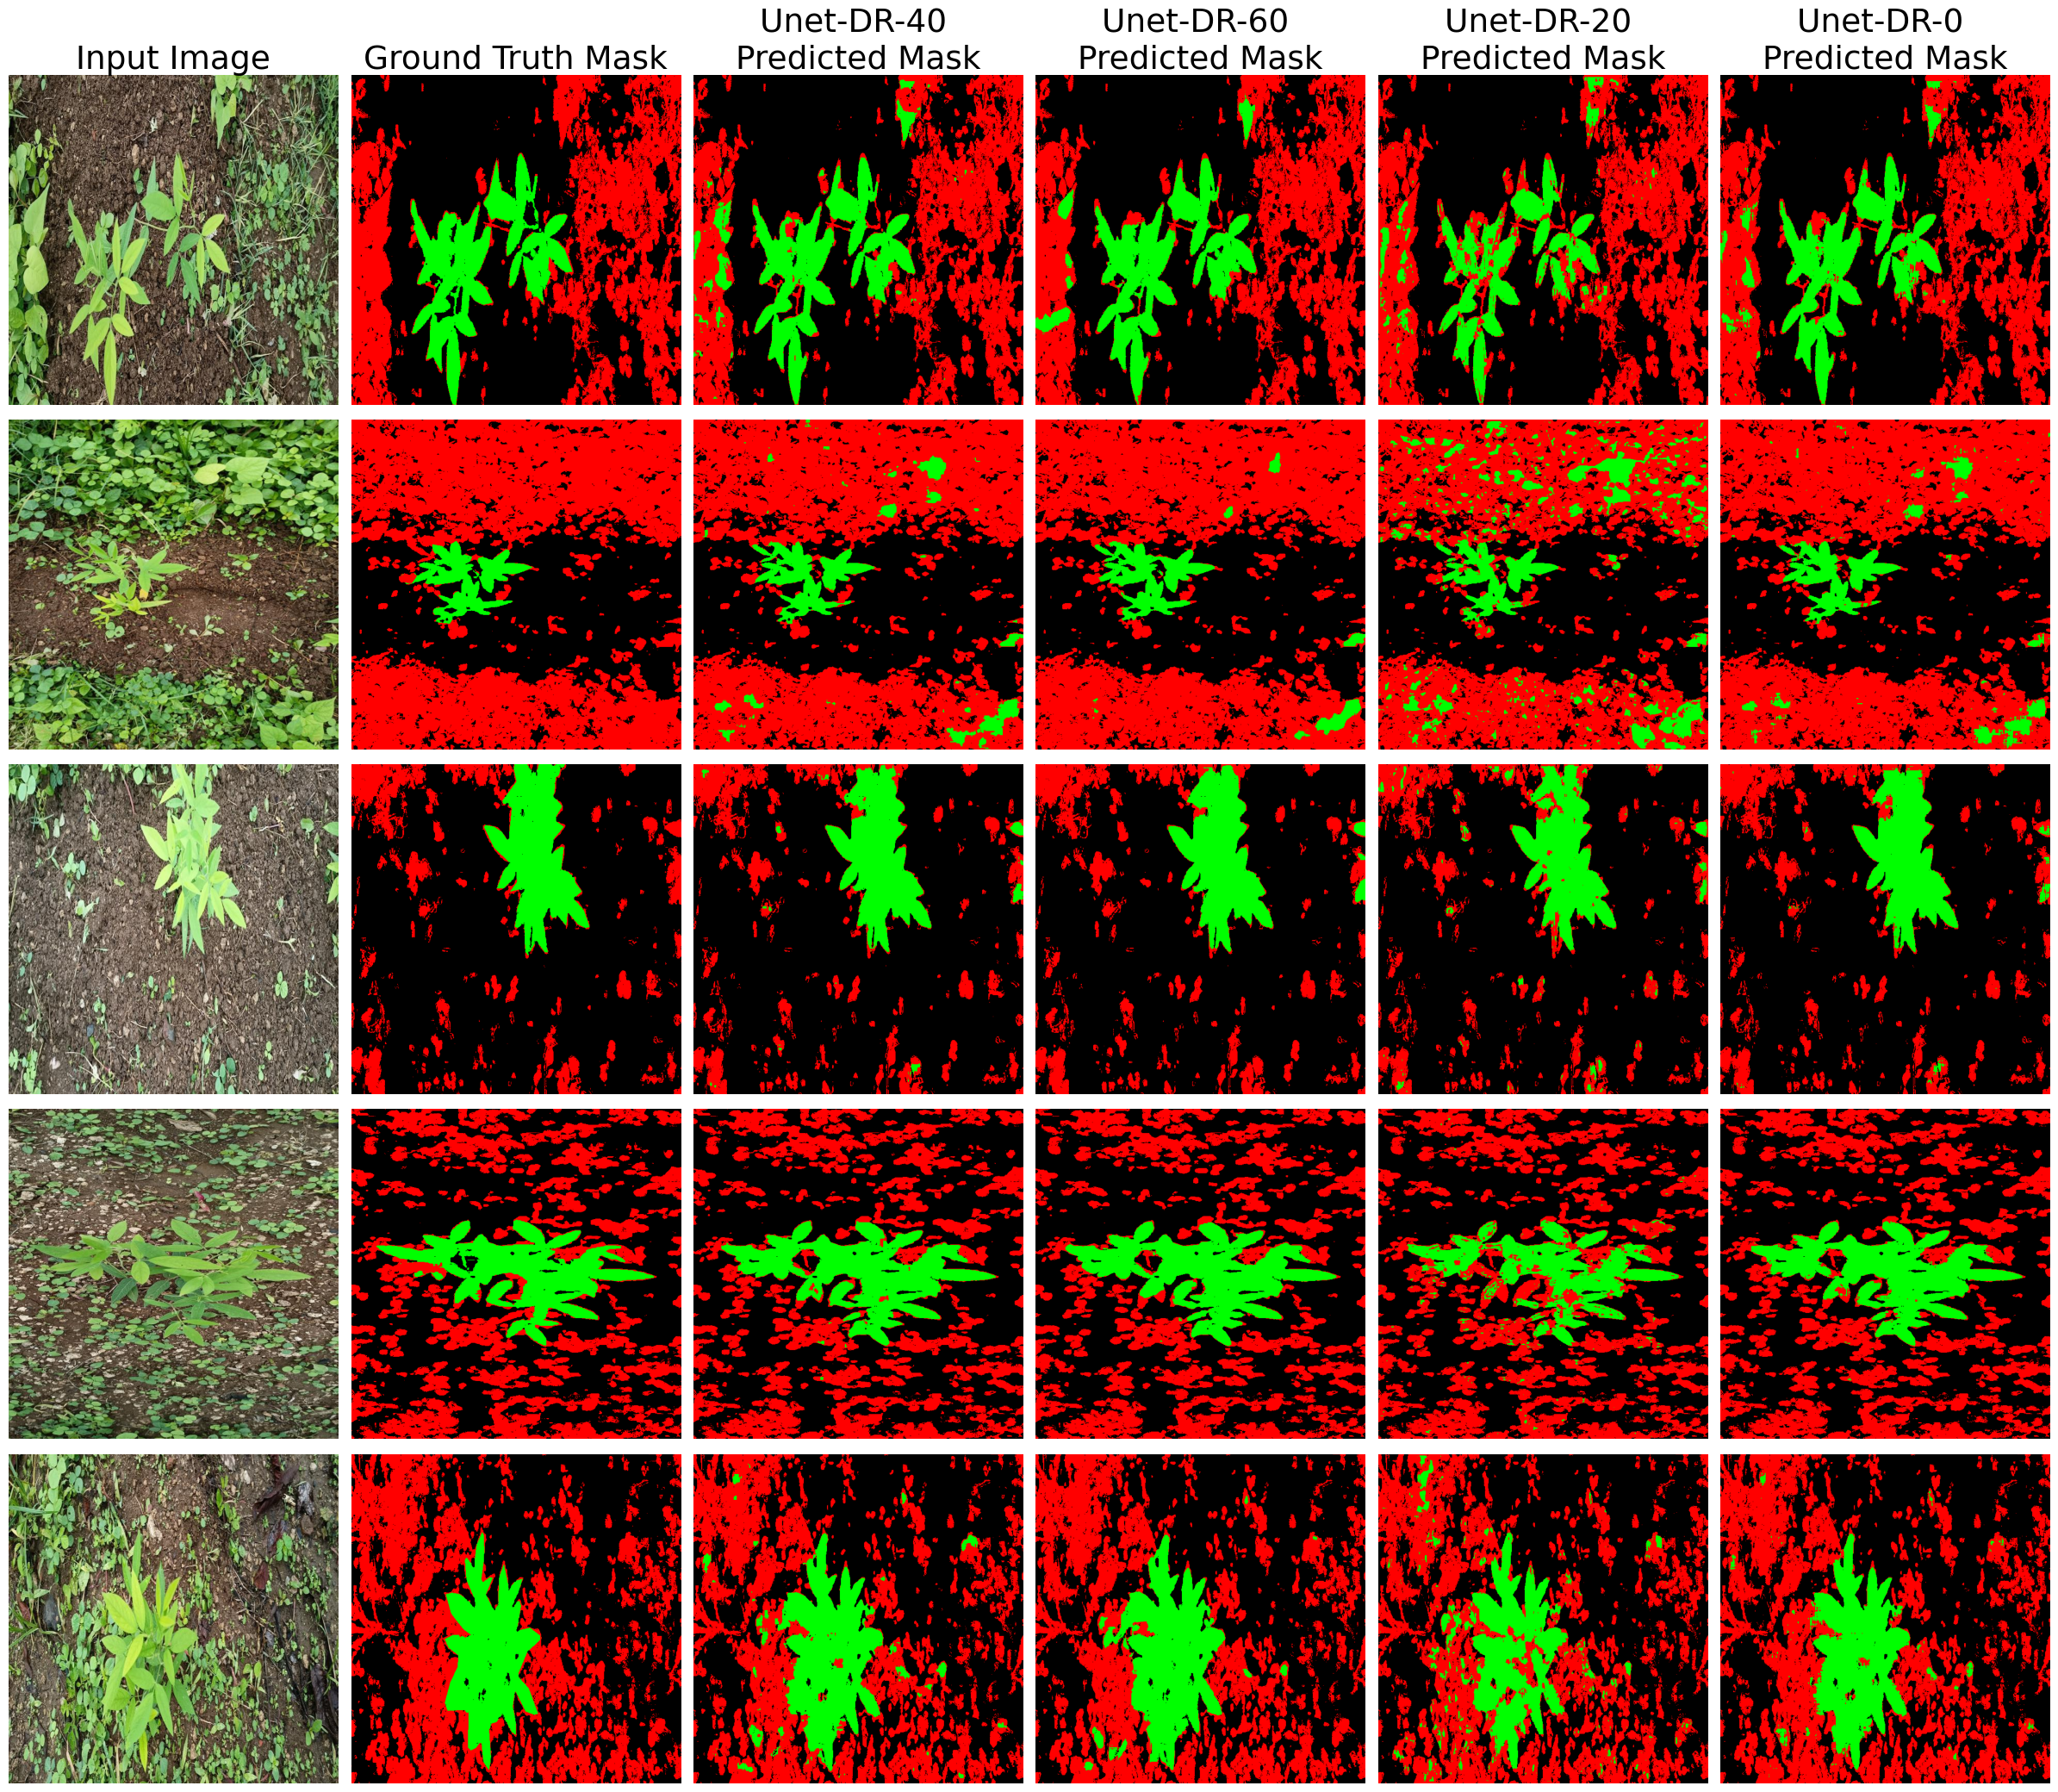

In [6]:
import os
import random
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) Automatically gather all directories starting with "Unet-"
# ------------------------------------------------------------------------------
all_dirs = [d for d in os.listdir('.') if os.path.isdir(d)]
model_dirs = [d for d in all_dirs if d.startswith("Unet-")]
models_info = [(d, os.path.join(d, "unet_best_model.pth")) for d in model_dirs]

# ------------------------------------------------------------------------------
# 2) Define directories / file paths and hyperparameters
# ------------------------------------------------------------------------------
TEST_IMAGE_FOLDER        = 'CWD-3HSV/test/images/'
GROUND_TRUTH_MASK_FOLDER = 'CWD-3HSV/test/Morphed_Images/'
PREDICTION_SAVE_FOLDER   = 'Predictions'
os.makedirs(PREDICTION_SAVE_FOLDER, exist_ok=True)

IMG_HEIGHT  = 640
IMG_WIDTH   = 640
NUM_CLASSES = 3
DEVICE      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ------------------------------------------------------------------------------
# 3) Define transformation (as used during training)
# ------------------------------------------------------------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
])

# ------------------------------------------------------------------------------
# 4) Helper functions
# ------------------------------------------------------------------------------
def load_full_model(model_path):
    model = torch.load(model_path, map_location=DEVICE)
    model = model.to(DEVICE)
    model.eval()
    return model

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(DEVICE)
    return image

def load_ground_truth_mask(mask_path):
    mask = Image.open(mask_path).convert('L')
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.NEAREST)
    return np.array(mask)

def generate_segmentation_mask(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)  # shape: (B, NUM_CLASSES, H, W)
        pred = torch.argmax(output, dim=1)
        return pred.squeeze().cpu().numpy()  # shape: (H, W)

def mask_to_rgb(mask_array):
    h, w = mask_array.shape
    rgb_image = np.zeros((h, w, 3), dtype=np.uint8)
    # Define the mapping for 3 classes
    class_rgb_mapping = {
        0: (0, 0, 0),      # Black for background (or class 0)
        1: (0, 255, 0),    # Green for class 1
        2: (255, 0, 0)     # Red for class 2
    }
    for cls, color in class_rgb_mapping.items():
        rgb_image[mask_array == cls] = color
    return rgb_image

# ------------------------------------------------------------------------------
# 5) Main execution: load models, select images, and create merged figure
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    # Load all models
    loaded_models = []
    for model_name, model_path in models_info:
        if not os.path.isfile(model_path):
            continue
        model = load_full_model(model_path)
        loaded_models.append((model_name, model))
    if len(loaded_models) == 0:
        exit(0)
    
    # Gather test images
    test_image_files = [f for f in os.listdir(TEST_IMAGE_FOLDER) if f.lower().endswith(('.jpg','.jpeg','.png'))]
    if len(test_image_files) == 0:
        exit(0)
    
    # Randomly select up to 5 images
    selected_images = random.sample(test_image_files, 5) if len(test_image_files) >= 5 else test_image_files

    # Set up figure:
    n_rows = len(selected_images)
    n_cols = 2 + len(loaded_models)  # 1: Input, 1: GT, rest: each model's prediction
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4.2 * n_rows))
    if n_rows == 1:
        axes = [axes]  # ensure axes is a list of rows

    # Process each image:
    for row_idx, image_file in enumerate(selected_images):
        input_image_path = os.path.join(TEST_IMAGE_FOLDER, image_file)
        gt_mask_name = os.path.splitext(image_file)[0] + '_morphed.png'
        gt_mask_path = os.path.join(GROUND_TRUTH_MASK_FOLDER, gt_mask_name)

        # Load and resize input image and ground truth mask for display
        original_image = Image.open(input_image_path).resize((IMG_WIDTH, IMG_HEIGHT))
        gt_mask_np = load_ground_truth_mask(gt_mask_path)
        gt_rgb = mask_to_rgb(gt_mask_np)

        # Preprocess image for model inference
        input_tensor = preprocess_image(input_image_path)

        # Column 0: Input image
        axes[row_idx][0].imshow(original_image)
        if row_idx == 0:
            axes[row_idx][0].set_title("Input Image", fontsize=27)
        axes[row_idx][0].axis('off')

        # Column 1: Ground truth mask
        axes[row_idx][1].imshow(gt_rgb)
        if row_idx == 0:
            axes[row_idx][1].set_title("Ground Truth Mask", fontsize=27)
        axes[row_idx][1].axis('off')

        # Next columns: Predictions from each model
        for model_i, (model_name, model_obj) in enumerate(loaded_models):
            pred_mask = generate_segmentation_mask(model_obj, input_tensor)
            pred_rgb = mask_to_rgb(pred_mask)
            col_idx = 2 + model_i
            axes[row_idx][col_idx].imshow(pred_rgb)
            if row_idx == 0:
                axes[row_idx][col_idx].set_title(f"{model_name} \nPredicted Mask", fontsize=27)
            axes[row_idx][col_idx].axis('off')

    plt.tight_layout()
    merged_filename = os.path.join(PREDICTION_SAVE_FOLDER, "All_Models_Predictions.png")
    plt.savefig(merged_filename, bbox_inches='tight',dpi=200)
    # Uncomment the next line if you wish to display the figure interactively
    plt.show()


# Saving Predictions of Each Model

In [6]:
import os
import random
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) Automatically gather all directories starting with "Unet-"
# ------------------------------------------------------------------------------
model_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and d.startswith("Unet")]

# ------------------------------------------------------------------------------
# 2) Define directories and hyperparameters
# ------------------------------------------------------------------------------
TEST_IMAGE_FOLDER        = 'CWD-3HSV/test/images/'
GROUND_TRUTH_MASK_FOLDER = 'CWD-3HSV/test/Morphed_Images/'
# (The merged prediction figure for each model will be saved in a "Predictions" subfolder of that model directory.)
IMG_HEIGHT  = 640
IMG_WIDTH   = 640
NUM_CLASSES = 3
DEVICE      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ------------------------------------------------------------------------------
# 3) Define the transformation (as used during training)
# ------------------------------------------------------------------------------
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
])

# ------------------------------------------------------------------------------
# 4) Helper functions
# ------------------------------------------------------------------------------
def load_full_model(model_dir):
    """Load the full model from <model_dir>/unet_best_model.pth."""
    model_path = os.path.join(model_dir, "unet_best_model.pth")
    if not os.path.isfile(model_path):
        return None
    model = torch.load(model_path, map_location=DEVICE)
    model = model.to(DEVICE)
    model.eval()
    return model

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(DEVICE)
    return image

def load_ground_truth_mask(mask_path):
    mask = Image.open(mask_path).convert('L')
    mask = mask.resize((IMG_WIDTH, IMG_HEIGHT), Image.NEAREST)
    return np.array(mask)

def generate_segmentation_mask(model, image_tensor):
    with torch.no_grad():
        # model outputs logits of shape (B, NUM_CLASSES, H, W)
        output = model(image_tensor)
        pred = torch.argmax(output, dim=1)
        return pred.squeeze().cpu().numpy()  # shape: (H, W)

def mask_to_rgb(mask_array):
    h, w = mask_array.shape
    rgb_image = np.zeros((h, w, 3), dtype=np.uint8)
    # Fixed mapping for 3 classes
    class_rgb_mapping = {
        0: (0, 0, 0),      # Black
        1: (0, 255, 0),    # Green
        2: (255, 0, 0)     # Red
    }
    for cls, color in class_rgb_mapping.items():
        rgb_image[mask_array == cls] = color
    return rgb_image

# ------------------------------------------------------------------------------
# 5) Main execution: Process each model directory
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    # Gather test images (all jpg/jpeg/png)
    test_image_files = [f for f in os.listdir(TEST_IMAGE_FOLDER) if f.lower().endswith(('.jpg','.jpeg','.png'))]
    if len(test_image_files) == 0:
        exit(0)
    
    # Randomly select up to 5 images
    selected_images = random.sample(test_image_files, 5) if len(test_image_files) >= 5 else test_image_files

    # Process each model directory that starts with "Unet-"
    for model_dir in model_dirs:
        model = load_full_model(model_dir)
        if model is None:
            continue
        
        # Create a Predictions subfolder inside the model directory
        predictions_dir = os.path.join(model_dir, "Predictions")
        os.makedirs(predictions_dir, exist_ok=True)
        
        # Set up a figure with one row per image and 3 columns (Input, Ground Truth, Predicted)
        n_rows = len(selected_images)
        n_cols = 3
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4.2 * n_rows))
        if n_rows == 1:
            axes = [axes]  # Ensure axes is a list of rows

        for row_idx, image_file in enumerate(selected_images):
            input_image_path = os.path.join(TEST_IMAGE_FOLDER, image_file)
            gt_mask_name = os.path.splitext(image_file)[0] + '_morphed.png'
            gt_mask_path = os.path.join(GROUND_TRUTH_MASK_FOLDER, gt_mask_name)
            
            # Load original image and ground truth for display
            original_image = Image.open(input_image_path).resize((IMG_WIDTH, IMG_HEIGHT))
            gt_mask_np = load_ground_truth_mask(gt_mask_path)
            gt_rgb = mask_to_rgb(gt_mask_np)
            
            # Preprocess image for inference
            input_tensor = preprocess_image(input_image_path)
            
            # Column 0: Input image
            axes[row_idx][0].imshow(original_image)
            if row_idx == 0:
                axes[row_idx][0].set_title("Input Image", fontsize=27)
            axes[row_idx][0].axis('off')
            
            # Column 1: Ground truth mask
            axes[row_idx][1].imshow(gt_rgb)
            if row_idx == 0:
                axes[row_idx][1].set_title("Ground Truth Mask", fontsize=27)
            axes[row_idx][1].axis('off')
            
            # Column 2: Predicted mask from this model
            pred_mask = generate_segmentation_mask(model, input_tensor)
            pred_rgb = mask_to_rgb(pred_mask)
            axes[row_idx][2].imshow(pred_rgb)
            if row_idx == 0:
                axes[row_idx][2].set_title(f"{model_dir} \nPredicted Mask", fontsize=27)
            axes[row_idx][2].axis('off')
        
        plt.tight_layout()
        merged_filename = os.path.join(predictions_dir, "All_Models_Predictions.png")
        # Save the figure at high resolution
        plt.savefig(merged_filename, bbox_inches='tight', dpi=300)
        plt.close(fig)


/tmp/ipykernel_8897/3991625222.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=DEVICE)


# Saving Results of each model

In [7]:
import os
import pandas as pd

# ------------------------------------------------------------------------------
# 1) Automatically gather all directories starting with "Unet-"
# ------------------------------------------------------------------------------
model_directories = [d for d in os.listdir('.') if os.path.isdir(d) and d.startswith("Unet")]

# Name of the Excel file in each model directory
excel_filename = "Performance_Evaluation_Metrics.xlsx"

# Loop over each found model directory
for model_dir in model_directories:
    # Construct the full path to the Excel file
    excel_path = os.path.join(model_dir, excel_filename)
    
    # Skip this directory if the file does not exist
    if not os.path.isfile(excel_path):
        continue
    
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_path)
    if df.empty:
        continue

    # Get the last (bottom) row from the DataFrame
    last_row = df.iloc[-1]
    
    # ------------------ Overall Metrics ------------------
    overall_metrics = {
        "Metric": [
            "Accuracy",
            "Precision",
            "Recall",
            "F1 Score",
            "Mean IoU",
            "Frequency Weighted IoU",
            "Mean Dice",
            "Mean Jaccard"
        ],
        "Value": [
            last_row["Accuracy"],
            last_row["Precision"],
            last_row["Recall"],
            last_row["F1 Score"],
            last_row["Mean IoU"],
            last_row["Frequency Weighted IoU"],
            last_row["Mean Dice"],
            last_row["Mean Jaccard"]
        ]
    }
    overall_df = pd.DataFrame(overall_metrics)
    
    # ------------------ Per-Class Metrics ------------------
    per_class_data = {
        "Class": ["Class 0", "Class 1", "Class 2"],
        "Accuracy": [
            last_row["Accuracy Class 0"],
            last_row["Accuracy Class 1"],
            last_row["Accuracy Class 2"]
        ],
        "Precision": [
            last_row["Precision Class 0"],
            last_row["Precision Class 1"],
            last_row["Precision Class 2"]
        ],
        "Recall": [
            last_row["Recall Class 0"],
            last_row["Recall Class 1"],
            last_row["Recall Class 2"]
        ],
        "F1 Score": [
            last_row["F1 Score Class 0"],
            last_row["F1 Score Class 1"],
            last_row["F1 Score Class 2"]
        ],
        "IoU": [
            last_row["IoU Class 0"],
            last_row["IoU Class 1"],
            last_row["IoU Class 2"]
        ],
        "Dice": [
            last_row["Dice Coefficient Class 0"],
            last_row["Dice Coefficient Class 1"],
            last_row["Dice Coefficient Class 2"]
        ],
        "Jaccard": [
            last_row["Jaccard Index Class 0"],
            last_row["Jaccard Index Class 1"],
            last_row["Jaccard Index Class 2"]
        ]
    }
    per_class_df = pd.DataFrame(per_class_data)
    
    # ------------------------------------------------------------------------------
    # 3) Save the new Excel files in a Results subfolder of the model directory
    # ------------------------------------------------------------------------------
    results_dir = os.path.join(model_dir, "Results")
    os.makedirs(results_dir, exist_ok=True)
    
    overall_excel_path = os.path.join(results_dir, "Overall_Metrics.xlsx")
    per_class_excel_path = os.path.join(results_dir, "Per_Class_Metrics.xlsx")
    
    overall_df.to_excel(overall_excel_path, index=False)
    per_class_df.to_excel(per_class_excel_path, index=False)


# Seperating All Models Perdormance Evaluation Sheet

In [8]:
import os
import pandas as pd

# ------------------------------------------------------------------------------
# 1) Path to the merged Excel file
# ------------------------------------------------------------------------------
merged_excel_path = os.path.join("Results", "All_Models_Performance_Evaluation_Metrics.xlsx")

# ------------------------------------------------------------------------------
# 2) Read the Excel file into a DataFrame
# ------------------------------------------------------------------------------
df = pd.read_excel(merged_excel_path)

# ------------------------------------------------------------------------------
# 3) Mapping to change model names
# ------------------------------------------------------------------------------
name_mapping = {
    "unet_best_model.pth": "Unet",
    "unetplusplus_best_model.pth": "Unet++",
    "manet_best_model.pth": "MAnet",
    "linknet_best_model.pth": "Linknet",
    "fpn_best_model.pth": "FPN",
    "pspnet_best_model.pth": "PSPNet",
    "pan_best_model.pth": "PAN",
    "deeplabv3_best_model.pth": "DeepLabV3",
    "deeplabv3plus_best_model.pth": "DeepLabV3+",
    "upernet_best_model.pth": "UPerNet",
    "segformer_best_model.pth": "Segformer"
}

# Update the "Model Name" column based on the mapping.
# If a model name is not found in the mapping, leave it unchanged.
df["Model Name"] = df["Model Name"].apply(lambda x: name_mapping.get(x, x))

# ------------------------------------------------------------------------------
# 4) Create Overall Metrics DataFrame
# ------------------------------------------------------------------------------
overall_columns = [
    "Model Name",
    "Accuracy",
    "Precision",
    "Recall",
    "F1 Score",
    "Mean IoU",
    "Weighted IoU",
    "Frequency Weighted IoU",
    "Mean Dice",
    "Mean Jaccard"
]
overall_df = df[overall_columns].copy()

# ------------------------------------------------------------------------------
# 5) Create Per-Class Metrics DataFrame
# ------------------------------------------------------------------------------
per_class_columns = [
    "Model Name",
    "Accuracy Class 0", "Accuracy Class 1", "Accuracy Class 2",
    "Precision Class 0", "Precision Class 1", "Precision Class 2",
    "Recall Class 0", "Recall Class 1", "Recall Class 2",
    "F1 Score Class 0", "F1 Score Class 1", "F1 Score Class 2",
    "IoU Class 0", "IoU Class 1", "IoU Class 2",
    "Dice Coefficient Class 0", "Dice Coefficient Class 1", "Dice Coefficient Class 2",
    "Jaccard Index Class 0", "Jaccard Index Class 1", "Jaccard Index Class 2"
]
per_class_df = df[per_class_columns].copy()

# ------------------------------------------------------------------------------
# 6) Save the two DataFrames to Excel (overwrite if re-executed)
# ------------------------------------------------------------------------------
overall_excel_path = os.path.join("Results", "Overall_Metrics.xlsx")
per_class_excel_path = os.path.join("Results", "Per_Class_Metrics.xlsx")

overall_df.to_excel(overall_excel_path, index=False)
per_class_df.to_excel(per_class_excel_path, index=False)

print(f"Saved overall metrics to: {overall_excel_path}")
print(f"Saved per-class metrics to: {per_class_excel_path}")


Saved overall metrics to: Results/Overall_Metrics.xlsx
Saved per-class metrics to: Results/Per_Class_Metrics.xlsx
